In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split



# Customer Data

In [2]:
df_customer = pd.read_csv('Customer_Data.csv', index_col = 0)

df_customer = df_customer.reset_index()

df_customer.head()

OrderID CustomerID                    Company     City          Region  \
0    10248      VINET  Vins et alcools Chevalier    Reims  Western Europe   
1    10248      VINET  Vins et alcools Chevalier    Reims  Western Europe   
2    10248      VINET  Vins et alcools Chevalier    Reims  Western Europe   
3    10249      TOMSP         Toms Spezialitäten  Münster  Western Europe   
4    10249      TOMSP         Toms Spezialitäten  Münster  Western Europe   

   Country  ProductID                        Product Category_Product  \
0   France         11                 Queso Cabrales   Dairy Products   
1   France         42  Singaporean Hokkien Fried Mee   Grains/Cereals   
2   France         72         Mozzarella di Giovanni   Dairy Products   
3  Germany         14                           Tofu          Produce   
4  Germany         51          Manjimup Dried Apples          Produce   

   Order_Date Shipped_Date  Processing_Days      Ship_Company  Unit_Price  \
0  2016-07-04   2016-07-16             12.0  Federal Shipping        14.0   
1  2016-07-04   2016-07-16             12.0  Federal Shipping         9.8   
2  2016-07-04   2016-07-16             12.0  Federal Shipping        34.8   
3  2016-07-05   2016-07-10              5.0    Speedy Express        18.6   
4  2016-07-05   2016-07-10              5.0    Speedy Express        42.4   

   Quantity  Discount  Total_Sales  
0        12       0.0        168.0  
1        10       0.0         98.0  
2         5       0.0        174.0  
3         9       0.0        167.4  
4        40       0.0       1696.0

In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609283 entries, 0 to 609282
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   OrderID           609283 non-null  int64  
 1   CustomerID        609283 non-null  object 
 2   Company           609283 non-null  object 
 3   City              596000 non-null  object 
 4   Region            596000 non-null  object 
 5   Country           596000 non-null  object 
 6   ProductID         609283 non-null  int64  
 7   Product           609283 non-null  object 
 8   Category_Product  609283 non-null  object 
 9   Order_Date        609283 non-null  object 
 10  Shipped_Date      609210 non-null  object 
 11  Processing_Days   609210 non-null  float64
 12  Ship_Company      609283 non-null  object 
 13  Unit_Price        609283 non-null  float64
 14  Quantity          609283 non-null  int64  
 15  Discount          609283 non-null  float64
 16  Total_Sales       60

In [4]:
df_customer.describe()

OrderID      ProductID  Processing_Days     Unit_Price  \
count  609283.000000  609283.000000    609210.000000  609283.000000   
mean    18785.560685      38.999563         7.315210      28.850379   
std      4484.093759      22.229827         6.787012      33.565470   
min     10248.000000       1.000000         0.000000       2.000000   
25%     14907.000000      20.000000         2.000000      13.250000   
50%     18789.000000      39.000000         5.000000      19.500000   
75%     22681.000000      58.000000        11.000000      33.250000   
max     26529.000000      77.000000        37.000000     263.500000   

            Quantity       Discount    Total_Sales  
count  609283.000000  609283.000000  609283.000000  
mean       25.503095       0.000199     735.925068  
std        14.453939       0.005978    1069.479150  
min         1.000000       0.000000       2.500000  
25%        13.000000       0.000000     216.000000  
50%        25.000000       0.000000     462.000000  
75%        38.000000       0.000000     864.800000  
max       130.000000       0.250000   15810.000000

In [5]:
#Check missing values
df_customer.isnull().sum()

OrderID                 0
CustomerID              0
Company                 0
City                13283
Region              13283
Country             13283
ProductID               0
Product                 0
Category_Product        0
Order_Date              0
Shipped_Date           73
Processing_Days        73
Ship_Company            0
Unit_Price              0
Quantity                0
Discount                0
Total_Sales             0
dtype: int64

In [6]:
#Hapus Missing values
df_customer = df_customer.dropna(subset= ['City', 'Region', 'Country', 'Shipped_Date', 'Processing_Days'])

In [7]:
column_dates = ['Order_Date', 'Shipped_Date'] #Buat variabel nama kolom tanggal

for col in column_dates:
    df_customer[col] = df_customer[col].astype(str).str[:10] # Ambil data tanggal saja (Menghapus data waktu)
    df_customer[col] = pd.to_datetime(df_customer[col], format='%Y-%m-%d') # Convert ke datetime



In [8]:
#check apakah ada data duplikat
df_customer.duplicated().sum()

np.int64(0)

In [9]:
df_customer['Order_Year'] = df_customer['Order_Date'].dt.year
df_customer['Order_Month'] = df_customer['Order_Date'].dt.month_name()

df_customer

OrderID CustomerID                    Company     City  \
0         10248      VINET  Vins et alcools Chevalier    Reims   
1         10248      VINET  Vins et alcools Chevalier    Reims   
2         10248      VINET  Vins et alcools Chevalier    Reims   
3         10249      TOMSP         Toms Spezialitäten  Münster   
4         10249      TOMSP         Toms Spezialitäten  Münster   
...         ...        ...                        ...      ...   
609278    26529      DUMON            Du monde entier   Nantes   
609279    26529      DUMON            Du monde entier   Nantes   
609280    26529      DUMON            Du monde entier   Nantes   
609281    26529      DUMON            Du monde entier   Nantes   
609282    26529      DUMON            Du monde entier   Nantes   

                Region  Country  ProductID                          Product  \
0       Western Europe   France         11                   Queso Cabrales   
1       Western Europe   France         42    Singaporean Hokkien Fried Mee   
2       Western Europe   France         72           Mozzarella di Giovanni   
3       Western Europe  Germany         14                             Tofu   
4       Western Europe  Germany         51            Manjimup Dried Apples   
...                ...      ...        ...                              ...   
609278  Western Europe   France         73                       Röd Kaviar   
609279  Western Europe   France         74                    Longlife Tofu   
609280  Western Europe   France         75             Rhönbräu Klosterbier   
609281  Western Europe   France         76                     Lakkalikööri   
609282  Western Europe   France         77  Original Frankfurter grüne Soße   

       Category_Product Order_Date Shipped_Date  Processing_Days  \
0        Dairy Products 2016-07-04   2016-07-16             12.0   
1        Grains/Cereals 2016-07-04   2016-07-16             12.0   
2        Dairy Products 2016-07-04   2016-07-16             12.0   
3               Produce 2016-07-05   2016-07-10              5.0   
4               Produce 2016-07-05   2016-07-10              5.0   
...                 ...        ...          ...              ...   
609278          Seafood 2023-01-10   2023-01-10              0.0   
609279          Produce 2023-01-10   2023-01-10              0.0   
609280        Beverages 2023-01-10   2023-01-10              0.0   
609281        Beverages 2023-01-10   2023-01-10              0.0   
609282       Condiments 2023-01-10   2023-01-10              0.0   

            Ship_Company  Unit_Price  Quantity  Discount  Total_Sales  \
0       Federal Shipping       14.00        12       0.0       168.00   
1       Federal Shipping        9.80        10       0.0        98.00   
2       Federal Shipping       34.80         5       0.0       174.00   
3         Speedy Express       18.60         9       0.0       167.40   
4         Speedy Express       42.40        40       0.0      1696.00   
...                  ...         ...       ...       ...          ...   
609278    United Package       15.00        38       0.0       570.00   
609279    United Package       10.00         3       0.0        30.00   
609280    United Package        7.75        19       0.0       147.25   
609281    United Package       18.00        33       0.0       594.00   
609282    United Package       13.00         4       0.0        52.00   

        Order_Year Order_Month  
0             2016        July  
1             2016        July  
2             2016        July  
3             2016        July  
4             2016        July  
...            ...         ...  
609278        2023     January  
609279        2023     January  
609280        2023     January  
609281        2023     January  
609282        2023     January  

[595927 rows x 19 columns]

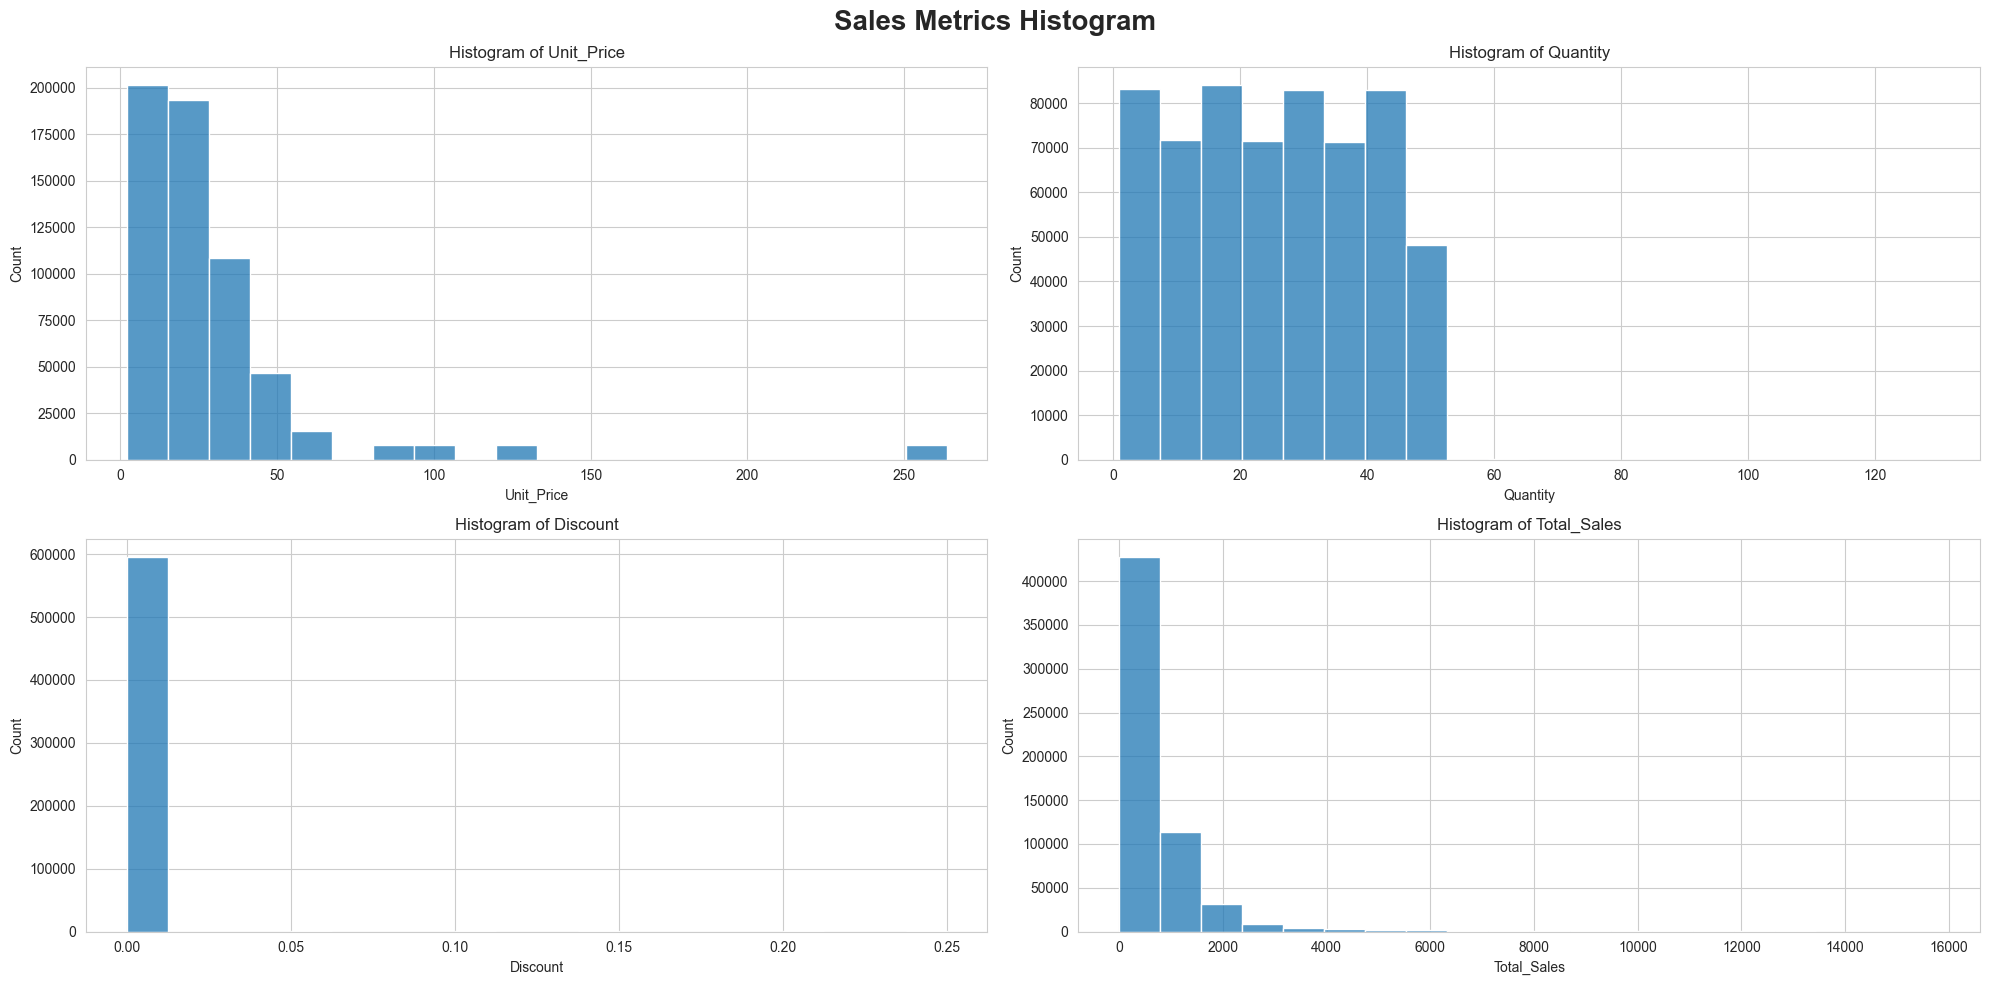

In [10]:
sales_metrics = ['Unit_Price', 'Quantity', 'Discount', 'Total_Sales']

def subplot_histogram(df, sales_metrics):
    
    plt.figure(figsize=(20,10))

    for i, col in enumerate(sales_metrics, 1):
        plt.subplot(2,2,i)
        sns.histplot(data = df,
                    x = col,
                    bins= 20)
        plt.title(f'Histogram of {col}')
        
    plt.suptitle('Sales Metrics Histogram', fontsize = 20, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

subplot_histogram(df_customer, sales_metrics)
        

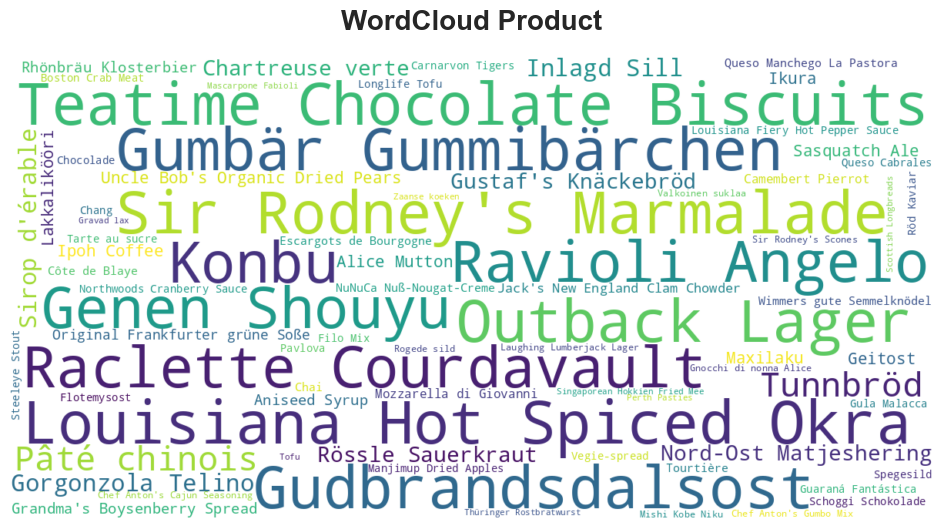

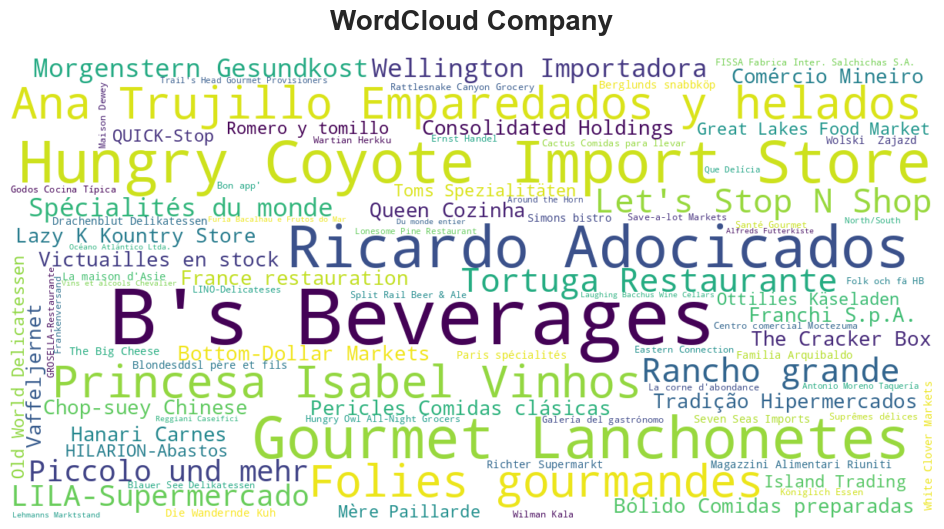

In [11]:
def create_wordcloud(df, col):

    data = df[col].value_counts().to_dict()

    data_wc = WordCloud(width= 1200, 
                        height= 600, 
                        background_color= 'white', 
                        colormap= 'viridis', 
                        relative_scaling= 0.5).generate_from_frequencies(data)


    plt.figure(figsize=(12,6))

    plt.imshow(data_wc, interpolation= 'bilinear')

    plt.title(f'WordCloud {col}', fontsize=20, pad=20, fontweight = 'bold')
    plt.axis('off')

    plt.show()

create_wordcloud(df_customer, 'Product')
create_wordcloud(df_customer, 'Company')

In [12]:
df_customer['Region'].unique()

array(['Western Europe', 'South America', 'Central America',
       'North America', 'Northern Europe', 'Scandinavia',
       'Southern Europe', 'British Isles', 'Eastern Europe'], dtype=object)

In [13]:
#Mengubah region Scandinavia menjadi Northern Europe

df_customer['Region'] = df_customer['Region'].replace('Scandinavia', 'Northern Europe')

df_customer

OrderID CustomerID                    Company     City  \
0         10248      VINET  Vins et alcools Chevalier    Reims   
1         10248      VINET  Vins et alcools Chevalier    Reims   
2         10248      VINET  Vins et alcools Chevalier    Reims   
3         10249      TOMSP         Toms Spezialitäten  Münster   
4         10249      TOMSP         Toms Spezialitäten  Münster   
...         ...        ...                        ...      ...   
609278    26529      DUMON            Du monde entier   Nantes   
609279    26529      DUMON            Du monde entier   Nantes   
609280    26529      DUMON            Du monde entier   Nantes   
609281    26529      DUMON            Du monde entier   Nantes   
609282    26529      DUMON            Du monde entier   Nantes   

                Region  Country  ProductID                          Product  \
0       Western Europe   France         11                   Queso Cabrales   
1       Western Europe   France         42    Singaporean Hokkien Fried Mee   
2       Western Europe   France         72           Mozzarella di Giovanni   
3       Western Europe  Germany         14                             Tofu   
4       Western Europe  Germany         51            Manjimup Dried Apples   
...                ...      ...        ...                              ...   
609278  Western Europe   France         73                       Röd Kaviar   
609279  Western Europe   France         74                    Longlife Tofu   
609280  Western Europe   France         75             Rhönbräu Klosterbier   
609281  Western Europe   France         76                     Lakkalikööri   
609282  Western Europe   France         77  Original Frankfurter grüne Soße   

       Category_Product Order_Date Shipped_Date  Processing_Days  \
0        Dairy Products 2016-07-04   2016-07-16             12.0   
1        Grains/Cereals 2016-07-04   2016-07-16             12.0   
2        Dairy Products 2016-07-04   2016-07-16             12.0   
3               Produce 2016-07-05   2016-07-10              5.0   
4               Produce 2016-07-05   2016-07-10              5.0   
...                 ...        ...          ...              ...   
609278          Seafood 2023-01-10   2023-01-10              0.0   
609279          Produce 2023-01-10   2023-01-10              0.0   
609280        Beverages 2023-01-10   2023-01-10              0.0   
609281        Beverages 2023-01-10   2023-01-10              0.0   
609282       Condiments 2023-01-10   2023-01-10              0.0   

            Ship_Company  Unit_Price  Quantity  Discount  Total_Sales  \
0       Federal Shipping       14.00        12       0.0       168.00   
1       Federal Shipping        9.80        10       0.0        98.00   
2       Federal Shipping       34.80         5       0.0       174.00   
3         Speedy Express       18.60         9       0.0       167.40   
4         Speedy Express       42.40        40       0.0      1696.00   
...                  ...         ...       ...       ...          ...   
609278    United Package       15.00        38       0.0       570.00   
609279    United Package       10.00         3       0.0        30.00   
609280    United Package        7.75        19       0.0       147.25   
609281    United Package       18.00        33       0.0       594.00   
609282    United Package       13.00         4       0.0        52.00   

        Order_Year Order_Month  
0             2016        July  
1             2016        July  
2             2016        July  
3             2016        July  
4             2016        July  
...            ...         ...  
609278        2023     January  
609279        2023     January  
609280        2023     January  
609281        2023     January  
609282        2023     January  

[595927 rows x 19 columns]

# Customer Segmentation (RFM)

In [14]:
max_dates = df_customer['Order_Date'].max() + pd.Timedelta(days=1)

rfm = df_customer.groupby('CustomerID').agg({
    'Order_Date' : lambda x : (max_dates - x.max()).days, # Recency
    'OrderID' : 'nunique', # Frequency
    'Total_Sales' : 'sum', # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm

CustomerID  Recency  Frequency      Monetary
0       ALFKI       14        163  3.965465e+06
1       ANATR        6        195  5.534357e+06
2       ANTON        7        163  4.311774e+06
3       AROUT       55        156  4.251822e+06
4       BERGS        7        178  4.833399e+06
..        ...      ...        ...           ...
86      WARTH       14        162  4.574419e+06
87      WELLI       34        185  5.333908e+06
88      WHITC        4        183  4.662708e+06
89      WILMK        5        169  4.635588e+06
90      WOLZA       21        177  4.738465e+06

[91 rows x 4 columns]

In [15]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], q = 5, labels= [5,4,3,2,1], duplicates= 'drop').astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop').astype(int)
rfm['RFM_Score'] = (rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)).astype(int)
rfm['Total_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

rfm = rfm.sort_values('Total_Score', ascending= False)

rfm

CustomerID  Recency  Frequency    Monetary  R_Score  F_Score  M_Score  \
1       ANATR        6        195  5534356.65        5        5        5   
25      FRANR        6        187  5180799.40        5        5        5   
35      HUNGC        4        198  5698023.67        5        5        5   
59      PRINI        6        200  5436770.55        5        5        5   
83      VICTE        7        188  5276686.06        5        5        5   
..        ...      ...        ...         ...      ...      ...      ...   
41      LAUGB       31        160  4259986.34        2        1        1   
17      DUMON       88        160  4236208.17        1        1        1   
3       AROUT       55        156  4251821.62        1        1        1   
5       BLAUS       47        163  4410759.75        1        1        1   
65      REGGC       58        159  4222835.27        1        1        1   

    RFM_Score  Total_Score  
1         555           15  
25        555           15  
35        555           15  
59        555           15  
83        555           15  
..        ...          ...  
41        211            4  
17        111            3  
3         111            3  
5         111            3  
65        111            3  

[91 rows x 9 columns]

In [16]:
def rfm_segment(df):
    if df['RFM_Score'] == 555:
        return 'Champions' # Pelanggan terbaik
    elif df['R_Score'] >= 4 and df['F_Score'] >= 4:
        return 'Loyal Customers' # Sering belanja, baru-baru ini
    elif df['R_Score'] >= 4 and df['M_Score'] >= 4:
        return 'Potential Loyalists' # Baru belanja, spending besar
    elif df['R_Score'] <= 2 and df['F_Score'] <= 2 and df['M_Score'] <= 2:
        return 'Lost Customers' # Sudah lama, jarang, spending kecil
    elif df['R_Score'] <= 2:
        return 'At Risk' # Sudah lama tidak belanja, tapi mungkin pernah bagus
    elif df['F_Score'] <= 2:
        return 'Needs Attention' # Belanja tapi jarang atau spending kecil
    else:
        return 'Reguler Customers' # Segmen lain yang mungkin tidak masuk kriteria di atas

rfm['Customer_Segment'] = rfm.apply(rfm_segment, axis=1)

rfm

CustomerID  Recency  Frequency    Monetary  R_Score  F_Score  M_Score  \
1       ANATR        6        195  5534356.65        5        5        5   
25      FRANR        6        187  5180799.40        5        5        5   
35      HUNGC        4        198  5698023.67        5        5        5   
59      PRINI        6        200  5436770.55        5        5        5   
83      VICTE        7        188  5276686.06        5        5        5   
..        ...      ...        ...         ...      ...      ...      ...   
41      LAUGB       31        160  4259986.34        2        1        1   
17      DUMON       88        160  4236208.17        1        1        1   
3       AROUT       55        156  4251821.62        1        1        1   
5       BLAUS       47        163  4410759.75        1        1        1   
65      REGGC       58        159  4222835.27        1        1        1   

    RFM_Score  Total_Score Customer_Segment  
1         555           15        Champions  
25        555           15        Champions  
35        555           15        Champions  
59        555           15        Champions  
83        555           15        Champions  
..        ...          ...              ...  
41        211            4   Lost Customers  
17        111            3   Lost Customers  
3         111            3   Lost Customers  
5         111            3   Lost Customers  
65        111            3   Lost Customers  

[91 rows x 10 columns]

In [17]:
rfm.groupby('Customer_Segment').mean(numeric_only= True)

Recency   Frequency      Monetary   R_Score   F_Score  \
Customer_Segment                                                               
At Risk              56.000000  177.640000  4.954055e+06  1.520000  3.280000   
Champions             6.333333  194.833333  5.427233e+06  5.000000  5.000000   
Lost Customers       50.545455  161.818182  4.377891e+06  1.454545  1.272727   
Loyal Customers       8.500000  185.583333  5.121615e+06  4.583333  4.250000   
Needs Attention      12.333333  163.166667  4.466005e+06  3.888889  1.500000   
Potential Loyalists  11.666667  171.000000  4.927683e+06  4.333333  2.666667   
Reguler Customers    15.375000  178.687500  4.838328e+06  3.500000  3.375000   

                      M_Score   RFM_Score  Total_Score  
Customer_Segment                                        
At Risk              3.640000  188.440000     8.440000  
Champions            5.000000  555.000000    15.000000  
Lost Customers       1.272727  159.454545     4.000000  
Loyal Customers      3.833333  504.666667    12.666667  
Needs Attention      1.722222  405.611111     7.111111  
Potential Loyalists  4.000000  464.000000    11.000000  
Reguler Customers    2.937500  386.687500     9.812500

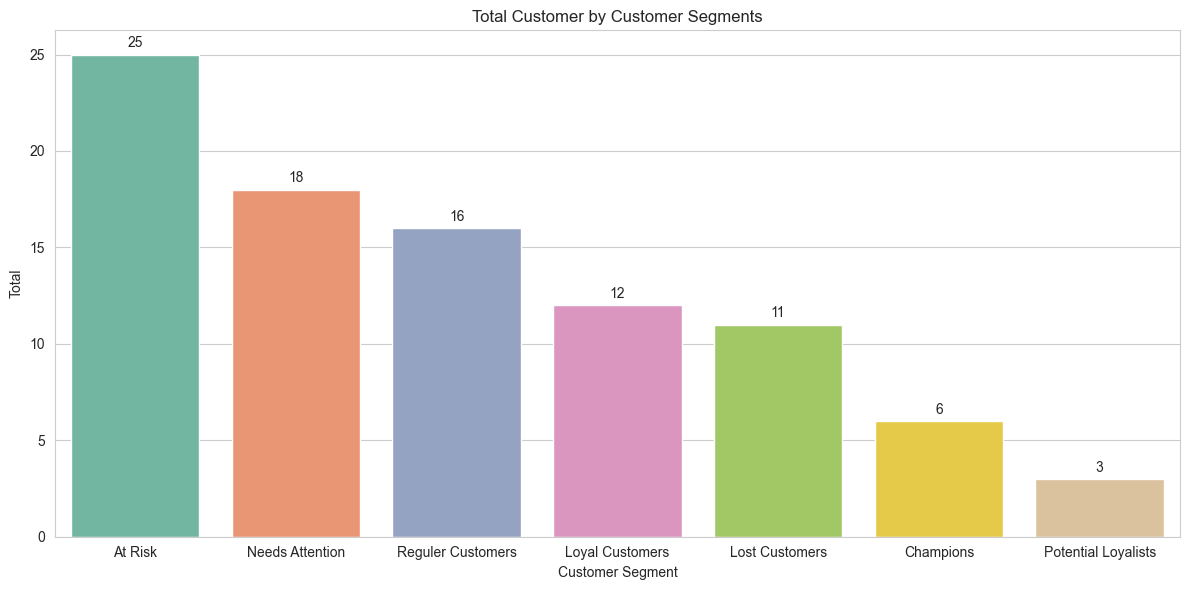

In [18]:
total_customer = rfm['Customer_Segment'].value_counts()

plt.figure(figsize=(12,6))

ax = sns.barplot(x= total_customer.index,
            y = total_customer.values,
            hue= total_customer.index,
            palette = 'Set2',
            errorbar= None)

plt.title('Total Customer by Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Total')

for container in ax.containers:
    ax.bar_label(container= container, label_type= 'edge', padding= 3)

plt.tight_layout()
plt.show()



<Axes: xlabel='Recency', ylabel='Frequency'>

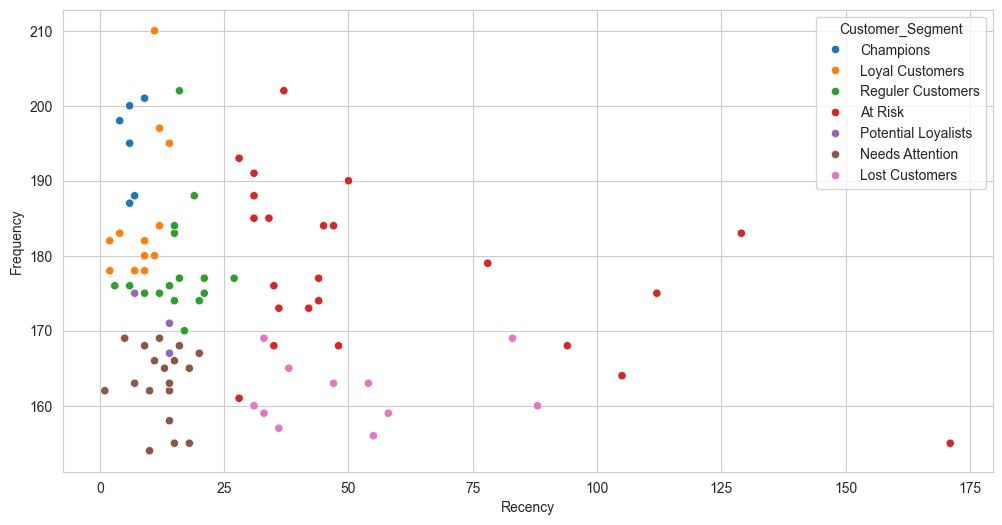

In [19]:
plt.figure(figsize=(12,6))

sns.scatterplot(data = rfm,
                x = 'Recency',
                y = 'Frequency',
                hue = 'Customer_Segment')

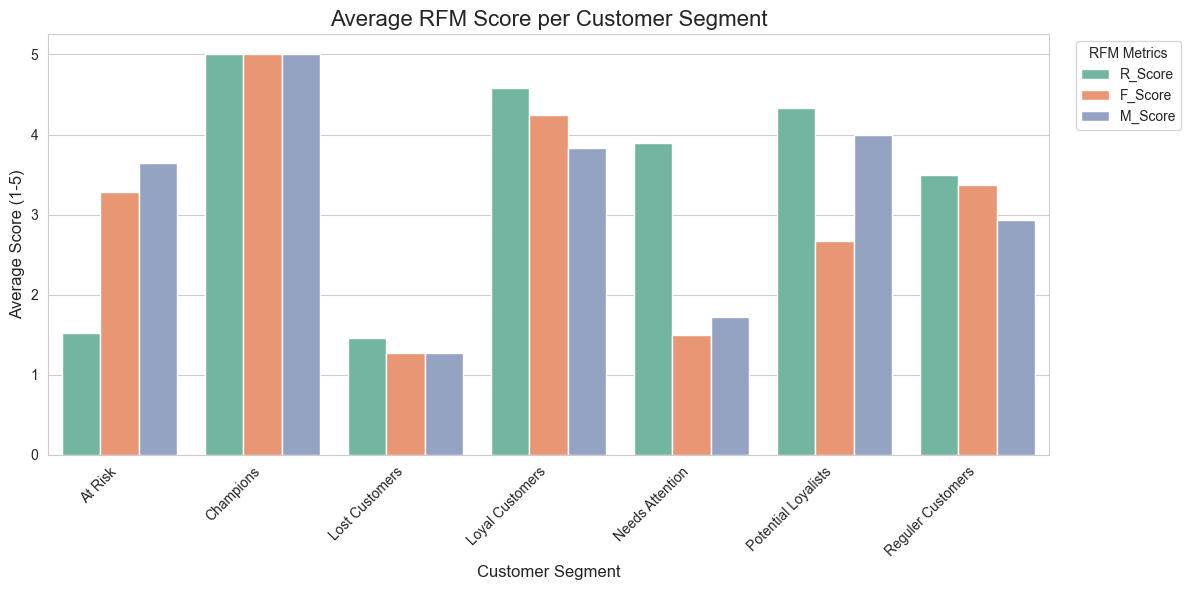

In [20]:
segment_scores = rfm.groupby('Customer_Segment')[['R_Score', 'F_Score', 'M_Score']].mean().reset_index()

segment_scores_melted = segment_scores.melt(id_vars='Customer_Segment',
                                             var_name='RFM_Metric',
                                             value_name='Average_Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=segment_scores_melted,
            x='Customer_Segment',
            y='Average_Score',
            hue='RFM_Metric',
            palette='Set2')

plt.title('Average RFM Score per Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Average Score (1-5)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='RFM Metrics', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

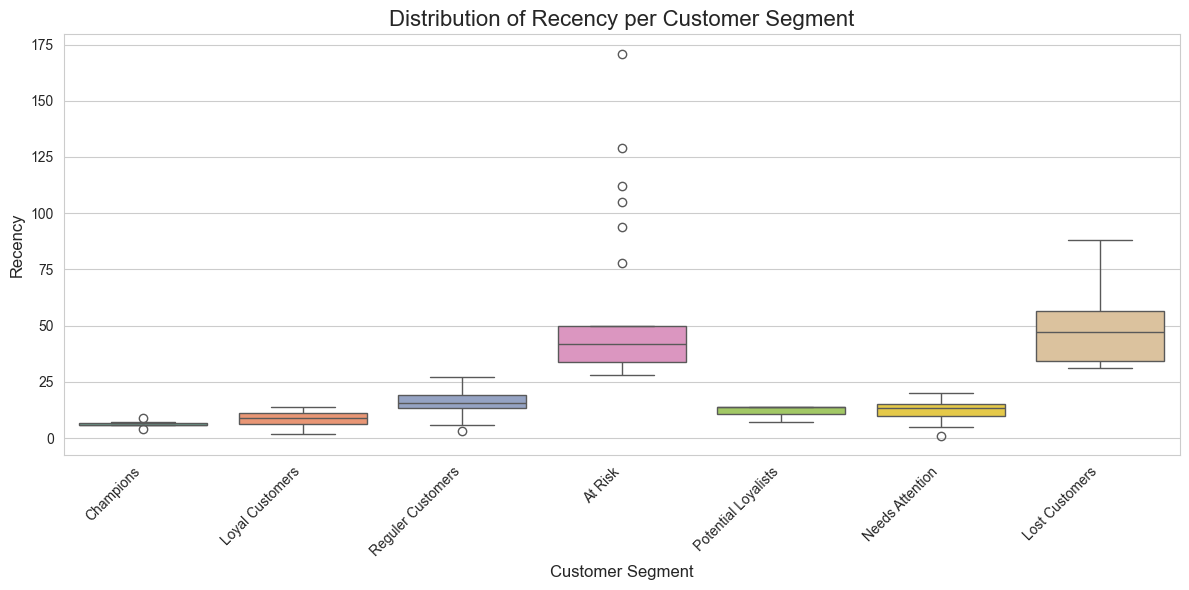

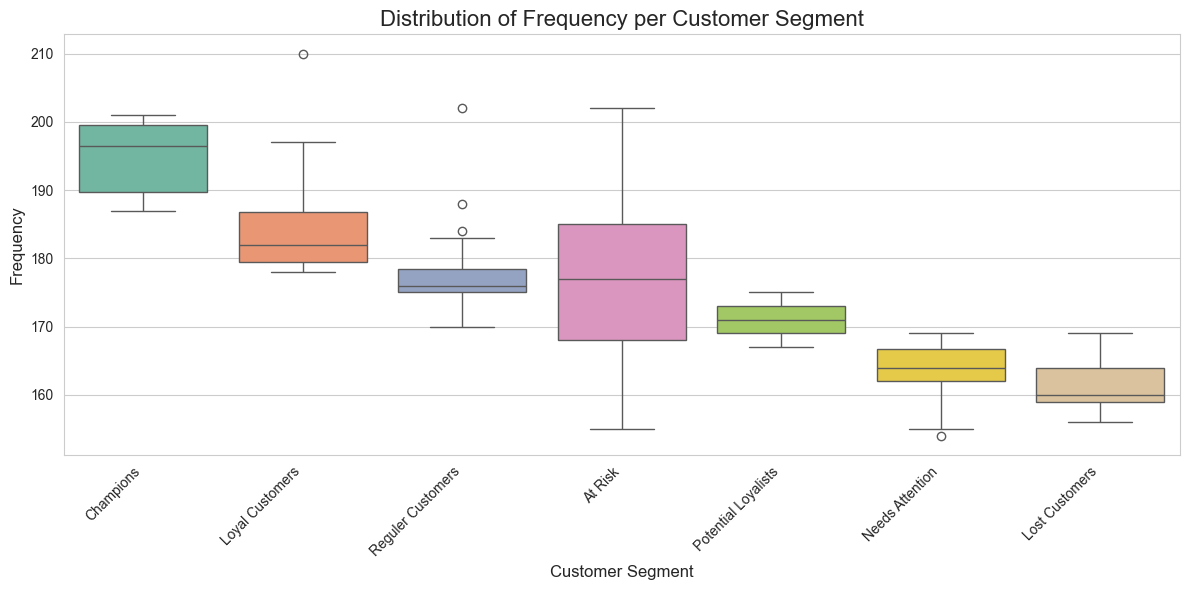

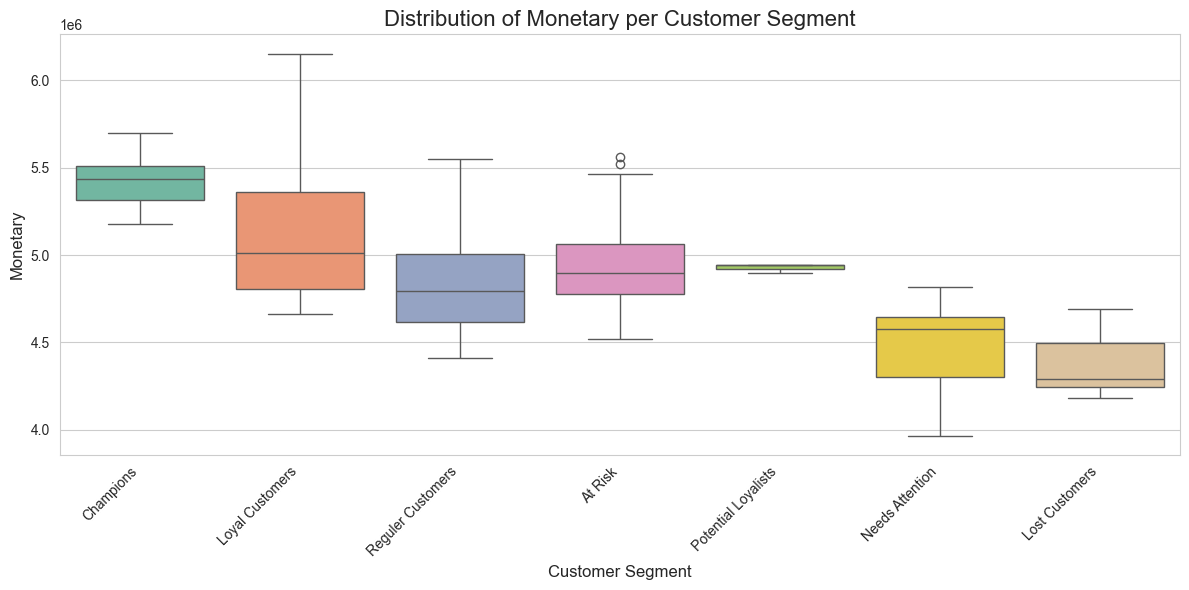

In [21]:
cols_target = ['Recency', 'Frequency', 'Monetary']

for col in cols_target:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=rfm, x='Customer_Segment', y= col, hue = 'Customer_Segment', palette='Set2')
    plt.title(f'Distribution of {col} per Customer Segment', fontsize=16)
    plt.xlabel('Customer Segment', fontsize=12)
    plt.ylabel(f'{col}', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)

    plt.tight_layout()
    plt.show()

In [22]:
rfm.to_csv('Customer_Data_RFM.csv')

In [23]:
df_customer.to_csv('Customer_Data_Clean.csv')

# City/Region/Country Sales Performance

In [24]:
region_data = df_customer.groupby(['Region', 'Country', 'Order_Year', 'Order_Month']).agg({
    'OrderID' : 'nunique',
    'Company' : 'nunique',
    'Product' : 'count',
    'Quantity' : 'sum',
    'Total_Sales' : 'sum'
}).reset_index()

region_data.columns = ['Region', 'Country', 'Year', 'Month', 'Total_Order', 'Total_Customer', 'Total_Product_Purchase', 'Total_Quantity', 'Total_Sales']

region_data

Region      Country  Year      Month  Total_Order  \
0      British Isles      Ireland  2012     August            1   
1      British Isles      Ireland  2012       July            1   
2      British Isles      Ireland  2012   November            1   
3      British Isles      Ireland  2012    October            2   
4      British Isles      Ireland  2012  September            2   
...              ...          ...   ...        ...          ...   
2634  Western Europe  Switzerland  2023       July            4   
2635  Western Europe  Switzerland  2023      March            1   
2636  Western Europe  Switzerland  2023        May            1   
2637  Western Europe  Switzerland  2023    October            2   
2638  Western Europe  Switzerland  2023  September            4   

      Total_Customer  Total_Product_Purchase  Total_Quantity  Total_Sales  
0                  1                      68            1883     50829.09  
1                  1                      11             218      5012.36  
2                  1                      38             901     17398.95  
3                  1                      57            1522     44714.17  
4                  1                      76            1941     58855.36  
...              ...                     ...             ...          ...  
2634               2                     179            4539    135269.20  
2635               1                      36             825     20568.35  
2636               1                      77            1961     56947.96  
2637               1                      59            1458     37526.51  
2638               2                     172            4399    127324.59  

[2639 rows x 9 columns]

In [25]:
def top_sales_product(df, col):

    data = df.groupby([col, 'Product', 'Order_Year'])['Total_Sales'].sum().reset_index()
    data.rename(columns = {'Total_Sales' : 'Total'}, inplace = True)
    top_product = data.loc[data.groupby([col, 'Order_Year'])['Total'].idxmax()]

    return top_product

top_sales_product_region_per_year = top_sales_product(df_customer, 'Region')
top_sales_product_country_per_year = top_sales_product(df_customer, 'Country')
top_sales_product_city_per_year = top_sales_product(df_customer, 'City')


In [26]:
def plot_treemap(df, col):

    fig = px.treemap(
        df,
        path=[col, 'Product'],
        values='Total',
        title=f'Produk dengan total penjualan terbesar berdasarkan {col}',
        color='Total',
        color_continuous_scale='Inferno'
    )

    fig.update_layout(
        margin=dict(t=50, l=25, r=25, b=25)
    )

    fig.show()

plot_treemap(top_sales_product_region_per_year, 'Region')
plot_treemap(top_sales_product_country_per_year, 'Country')
plot_treemap(top_sales_product_city_per_year, 'City')

Produk Côte de Blaye menjadi produk dengan total penjualan tertinggi secara konsisten di seluruh level wilayah, baik berdasarkan negara (country), kota (city), maupun regional. Dominasi penjualannya terlihat jelas di negara-negara seperti US, France, dan Germany, serta kota-kota besar seperti London, São Paulo, dan México. Hal ini menunjukkan bahwa Côte de Blaye merupakan produk unggulan dengan permintaan tinggi dan penetrasi pasar yang luas, menjadikannya kandidat utama untuk difokuskan dalam strategi pemasaran dan distribusi perusahaan.

In [27]:
cote_de_blaye = df_customer[df_customer['Product'] == 'Côte de Blaye']
cote_de_blaye = cote_de_blaye.groupby(['Product', 'Order_Year']).agg({
    'OrderID' : 'nunique',
    'Quantity' : 'sum',
    'Total_Sales' : 'sum'}).reset_index()

cote_de_blaye.columns = ['Product', 'Order_Year', 'Total_Order', 'Quantity', 'Total_Sales']

cote_de_blaye['Order_Year'] = cote_de_blaye['Order_Year'].astype(str)

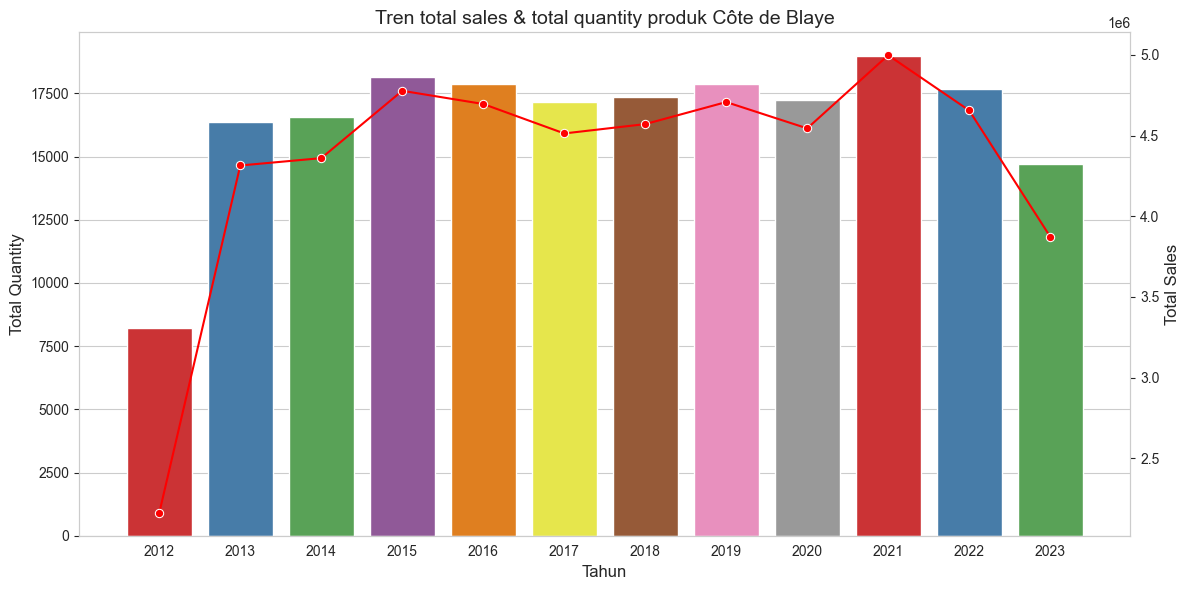

In [28]:
fig, ax_1 = plt.subplots(figsize=(12,6))


ax_1 = sns.barplot(data = cote_de_blaye,
            x = 'Order_Year',
            y = 'Quantity',
            hue = 'Order_Year',
            palette= 'Set1',
            )

ax_2 = plt.twinx()

ax_2 = sns.lineplot(data = cote_de_blaye,
             x = 'Order_Year',
             y = 'Total_Sales',
             marker = 'o',
             color = 'red',
             )

plt.title('Tren total sales & total quantity produk Côte de Blaye', fontsize = 14)
ax_1.set_xlabel('Tahun', fontsize = 12)
ax_1.set_ylabel('Total Quantity', fontsize = 12)
ax_2.set_ylabel('Total Sales', fontsize = 12)
plt.grid(False)

plt.tight_layout()
plt.show()

In [29]:
def top_order_product_per_year(df, col):

    product_sold = df.groupby([col, 'Product', 'Order_Year']).size().reset_index(name= 'Total')
    top_product = product_sold.loc[product_sold.groupby([col, 'Order_Year'])['Total'].idxmax()]

    return top_product

top_order_product_region_per_year = top_order_product_per_year(df_customer, 'Region')
top_order_product_country_per_year = top_order_product_per_year(df_customer, 'Country')
top_order_product_city_per_year = top_order_product_per_year(df_customer, 'City')


In [30]:
plot_treemap(top_order_product_region_per_year, 'Region')
plot_treemap(top_order_product_country_per_year, 'Country')
plot_treemap(top_order_product_city_per_year, 'City')

In [31]:
def top_order_product_over_time(df, col):

    top_product = df.groupby([col, 'Product'])['Total'].sum().reset_index()
    top_product = top_product.loc[top_product.groupby([col])['Total'].idxmax()]
    top_product.sort_values(by = 'Total', ascending = False, inplace = True)

    return top_product

top_order_product_region_over_time = top_order_product_over_time(top_order_product_region_per_year, 'Region')
top_order_product_country_over_time = top_order_product_over_time(top_order_product_country_per_year, 'Country')
top_order_product_city_over_time = top_order_product_over_time(top_order_product_city_per_year, 'City')


In [32]:
plot_treemap(top_order_product_region_over_time, 'Region')
plot_treemap(top_order_product_country_over_time, 'Country')
plot_treemap(top_order_product_city_over_time, 'City')

In [33]:
country_data = region_data.groupby('Country')[['Total_Order', 'Total_Customer', 'Total_Product_Purchase', 'Total_Quantity', 'Total_Sales']].sum().reset_index()

country_data

Country  Total_Order  Total_Customer  Total_Product_Purchase  \
0     Argentina          514             296                   19157   
1       Austria          362             198                   13442   
2       Belgium          331             195                   12598   
3        Brazil         1657             892                   62159   
4        Canada          519             286                   19410   
5       Denmark          331             195                   13388   
6       Finland          331             198                   12497   
7        France         1907            1072                   72422   
8       Germany         1893            1069                   69364   
9       Ireland          182              97                    6442   
10        Italy          518             296                   19047   
11       Mexico          897             494                   33781   
12       Norway          159              89                    6409   
13       Poland          177              93                    6448   
14     Portugal          355             208                   13051   
15        Spain          849             487                   32675   
16       Sweden          353             202                   12609   
17  Switzerland          357             203                   13290   
18           UK         1234             686                   46055   
19          USA         2277            1254                   85451   
20    Venezuela          723             399                   26232   

    Total_Quantity   Total_Sales  
0           489032  1.423319e+07  
1           341439  9.898385e+06  
2           321024  9.425760e+06  
3          1591130  4.579791e+07  
4           495100  1.420036e+07  
5           337983  9.708143e+06  
6           318137  9.210007e+06  
7          1845441  5.332248e+07  
8          1774674  5.119328e+07  
9           164738  4.732282e+06  
10          486328  1.400033e+07  
11          861486  2.480198e+07  
12          163913  4.691251e+06  
13          165028  4.738465e+06  
14          332338  9.535418e+06  
15          830094  2.402350e+07  
16          322734  9.299699e+06  
17          340993  9.822890e+06  
18         1170811  3.395925e+07  
19         2175886  6.259960e+07  
20          668540  1.942115e+07

In [34]:
fig = px.choropleth(
    country_data,
    locations = 'Country',
    locationmode= 'country names',
    color = 'Total_Sales',
    hover_name = 'Country',
    hover_data= {'Total_Sales' : True, 'Total_Quantity' : True, 'Total_Order' : True},
    title="Transaction Distribution by Country",
    color_continuous_scale="Blues",

)

fig.update_layout(
    geo=dict(
        showland=True,
        showcountries=True,
        showocean=True,
        oceancolor='lightblue',
        countrycolor='gray'
    ),
    height=600,  # Tinggi gambar
    width=1200   # Lebar gambar
)

fig.show()

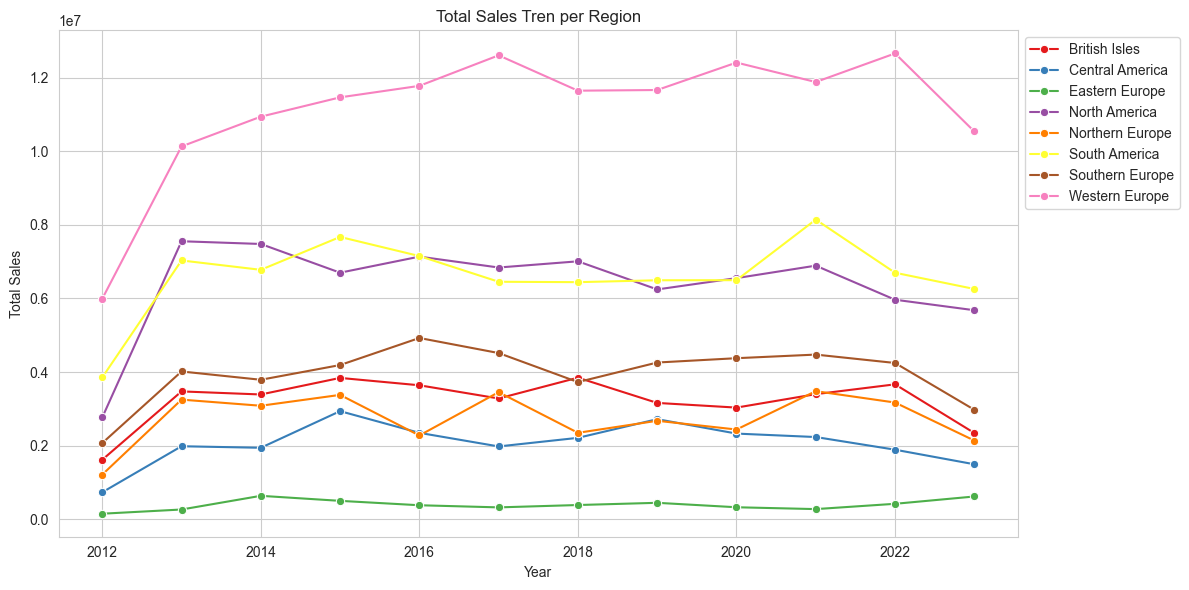

In [35]:
plt.figure(figsize=(12,6))

sns.lineplot(data = region_data,
             x = 'Year',
             y = 'Total_Sales',
             estimator= 'sum',
             hue = 'Region',
             errorbar= None,
             marker = 'o',
             palette= 'Set1')

plt.title('Total Sales Tren per Region')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(bbox_to_anchor = [1,1])

plt.tight_layout()
plt.show()


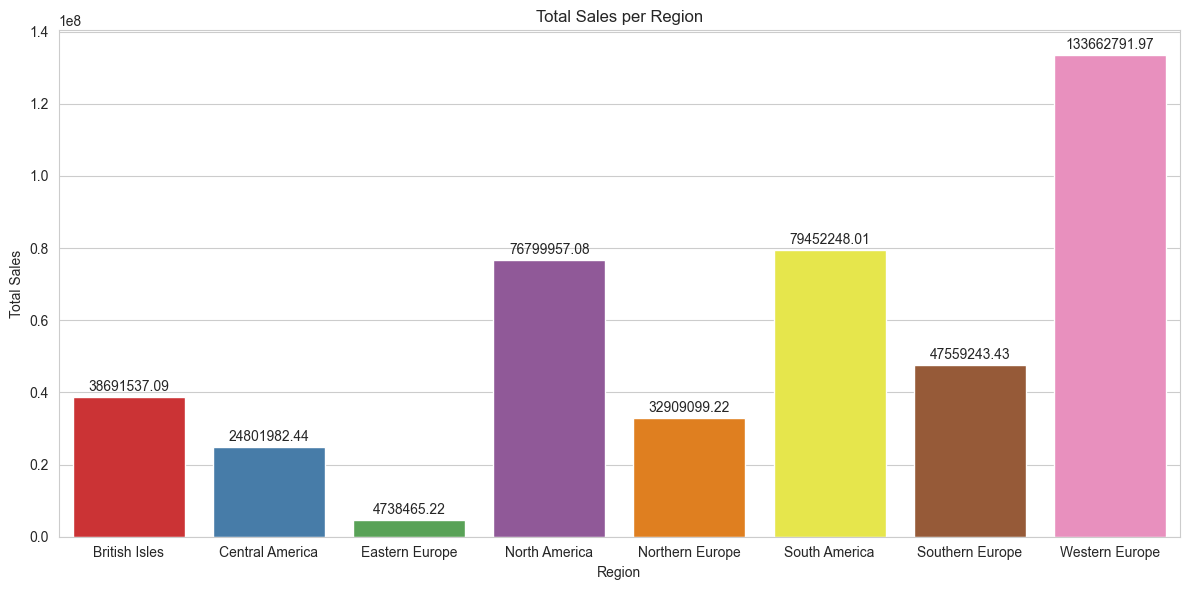

In [36]:
plt.figure(figsize=(12,6))

ax = sns.barplot(data = region_data,
             x = 'Region',
             y = 'Total_Sales',
             estimator= 'sum',
             hue = 'Region',
             errorbar= None,
             palette= 'Set1')

plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')

for container in ax.containers:
    ax.bar_label(container, fmt= '%.2f', label_type= 'edge', padding= 2)

plt.tight_layout()
plt.show()


##### Analisis Penjualan pada Region Europe

In [37]:
column_names = ['Western Europe', 'Eastern Europe', 'Northern Europe', 'Southern Europe']

europe_data = region_data[region_data['Region'].isin(column_names)]

europe_data

Region      Country  Year      Month  Total_Order  \
367   Eastern Europe       Poland  2012     August            2   
368   Eastern Europe       Poland  2012   December            2   
369   Eastern Europe       Poland  2012       July            1   
370   Eastern Europe       Poland  2012    October            1   
371   Eastern Europe       Poland  2013     August            3   
...              ...          ...   ...        ...          ...   
2634  Western Europe  Switzerland  2023       July            4   
2635  Western Europe  Switzerland  2023      March            1   
2636  Western Europe  Switzerland  2023        May            1   
2637  Western Europe  Switzerland  2023    October            2   
2638  Western Europe  Switzerland  2023  September            4   

      Total_Customer  Total_Product_Purchase  Total_Quantity  Total_Sales  
367                1                      55            1318     37874.05  
368                1                      79            2143     65415.68  
369                1                      37             990     31950.80  
370                1                      16             363     16321.71  
371                1                      64            1733     41344.07  
...              ...                     ...             ...          ...  
2634               2                     179            4539    135269.20  
2635               1                      36             825     20568.35  
2636               1                      77            1961     56947.96  
2637               1                      59            1458     37526.51  
2638               2                     172            4399    127324.59  

[1600 rows x 9 columns]

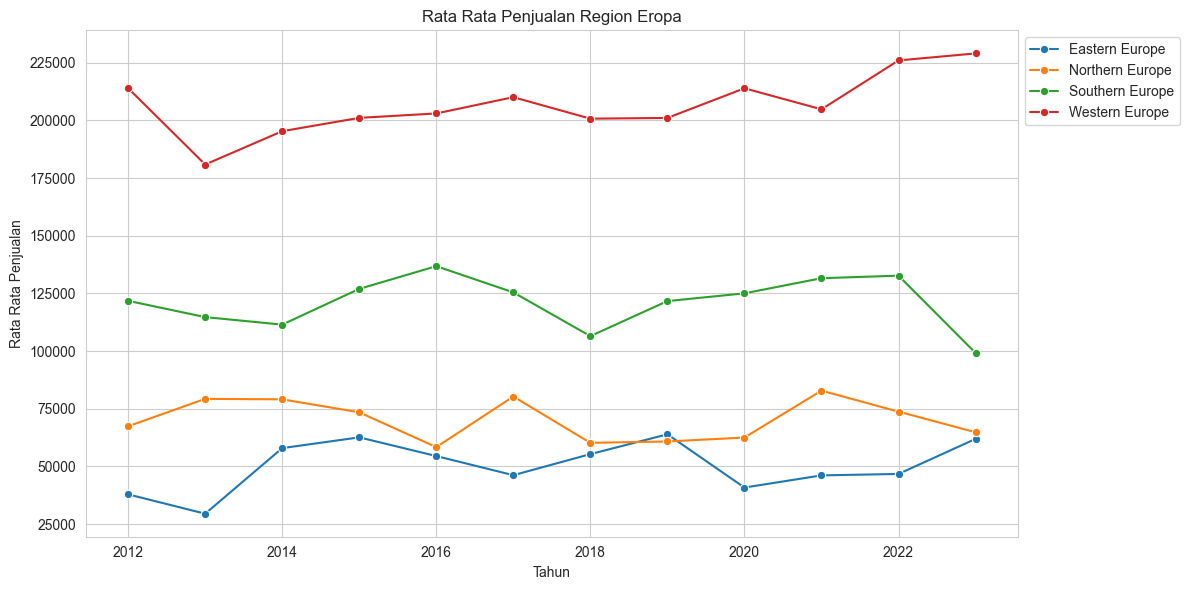

In [38]:
plt.figure(figsize=(12,6))

sns.lineplot(data = europe_data,
             x = 'Year',
             y = 'Total_Sales',
             hue = 'Region',
             marker = 'o',
             errorbar= None,
             estimator= 'mean')

plt.title('Rata Rata Penjualan Region Eropa')
plt.xlabel('Tahun')
plt.ylabel('Rata Rata Penjualan')
plt.legend(bbox_to_anchor = [1,1])

plt.tight_layout()
plt.show()

Western Europe merupakan subregion Eropa dengan rata-rata penjualan tertinggi dibandingkan subregion lainnya. Meskipun sempat mengalami penurunan signifikan pada tahun 2013, Western Europe berhasil meningkatkan kembali performa penjualannya pada tahun-tahun berikutnya dan menunjukkan tren yang relatif stabil hingga tahun 2023.

Sementara itu, Eastern Europe menjadi subregion dengan rata-rata penjualan terendah sepanjang periode yang diamati. Penjualannya cenderung fluktuatif dan tidak menunjukkan pertumbuhan yang konsisten.

Subregion lainnya seperti Southern Europe dan Northern Europe memiliki rata-rata penjualan yang berada di antara dua ekstrem tersebut. Southern Europe menunjukkan tren yang cukup stabil meskipun mengalami sedikit penurunan di akhir periode. Northern Europe sendiri tampak mengalami fluktuasi cukup besar, dengan beberapa kali naik turun selama kurun waktu tersebut.

Secara keseluruhan, grafik ini menunjukkan bahwa pasar Western Europe masih menjadi yang paling potensial dari sisi penjualan, sedangkan Eastern Europe membutuhkan perhatian lebih untuk meningkatkan performa di masa mendatang.

In [39]:
region_data.to_csv('Region_Data_Sales.csv')

# Product Inventory

In [40]:
df_product = pd.read_csv('Product_Inventory.csv', index_col = 0)

df_product = df_product.reset_index()

df_product

ProductID              ProductName    CategoryName  \
0          38            Côte de Blaye       Beverages   
1          29  Thüringer Rostbratwurst    Meat/Poultry   
2           9          Mishi Kobe Niku    Meat/Poultry   
3          20   Sir Rodney's Marmalade     Confections   
4          18         Carnarvon Tigers         Seafood   
..        ...                      ...             ...   
72         54                Tourtière    Meat/Poultry   
73         52                 Filo Mix  Grains/Cereals   
74         13                    Konbu         Seafood   
75         24       Guaraná Fantástica       Beverages   
76         33                  Geitost  Dairy Products   

                         SupplierName  UnitPrice  UnitsInStock  UnitsOnOrder  \
0          Aux joyeux ecclésiastiques     263.50            17             0   
1   Plutzer Lebensmittelgroßmärkte AG     123.79             0             0   
2                       Tokyo Traders      97.00            29             0   
3            Specialty Biscuits, Ltd.      81.00            40             0   
4                       Pavlova, Ltd.      62.50            42             0   
..                                ...        ...           ...           ...   
72                          Ma Maison       7.45            21             0   
73                        G'day, Mate       7.00            38             0   
74                           Mayumi's       6.00            24             0   
75          Refrescos Americanas LTDA       4.50            20             0   
76                    Norske Meierier       2.50           112             0   

    ReorderLevel  Discontinued  TotalUnitsOrdered       Revenue  
0             15             0             202234  5.326590e+07  
1              0             1             199010  2.462347e+07  
2              0             1             200258  1.942304e+07  
3              0             0             205637  1.665381e+07  
4              0             0             201747  1.260467e+07  
..           ...           ...                ...           ...  
72            10             0             202688  1.509129e+06  
73            25             0             203091  1.421370e+06  
74             5             0             202499  1.214608e+06  
75             0             1             201959  9.082574e+05  
76            20             0             202944  5.071206e+05  

[77 rows x 11 columns]

In [41]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          77 non-null     int64  
 1   ProductName        77 non-null     object 
 2   CategoryName       77 non-null     object 
 3   SupplierName       77 non-null     object 
 4   UnitPrice          77 non-null     float64
 5   UnitsInStock       77 non-null     int64  
 6   UnitsOnOrder       77 non-null     int64  
 7   ReorderLevel       77 non-null     int64  
 8   Discontinued       77 non-null     int64  
 9   TotalUnitsOrdered  77 non-null     int64  
 10  Revenue            77 non-null     float64
dtypes: float64(2), int64(6), object(3)
memory usage: 6.7+ KB


In [42]:
df_product.describe()

ProductID   UnitPrice  UnitsInStock  UnitsOnOrder  ReorderLevel  \
count  77.000000   77.000000     77.000000     77.000000     77.000000   
mean   39.000000   28.866364     40.506494     10.129870     12.467532   
std    22.371857   33.815111     36.147222     23.141072     10.931105   
min     1.000000    2.500000      0.000000      0.000000      0.000000   
25%    20.000000   13.250000     15.000000      0.000000      0.000000   
50%    39.000000   19.500000     26.000000      0.000000     10.000000   
75%    58.000000   33.250000     61.000000      0.000000     25.000000   
max    77.000000  263.500000    125.000000    100.000000     30.000000   

       Discontinued  TotalUnitsOrdered       Revenue  
count     77.000000          77.000000  7.700000e+01  
mean       0.103896      201800.025974  5.823203e+06  
std        0.307127        1685.338338  6.823418e+06  
min        0.000000      197673.000000  5.071206e+05  
25%        0.000000      200926.000000  2.622965e+06  
50%        0.000000      201751.000000  3.982093e+06  
75%        0.000000      202688.000000  6.688749e+06  
max        1.000000      206213.000000  5.326590e+07

In [43]:
df_product['TotalPriceInStock'] = df_product['UnitPrice'] * df_product['UnitsInStock']
df_product['TotalPriceOnOrder'] = df_product['UnitPrice'] * df_product['UnitsOnOrder']
df_product['NeedRestock'] = np.where(
    df_product['Discontinued'] == 1,
    0,
    np.where(df_product['UnitsInStock'] < df_product['ReorderLevel'], 1, 0)
)
df_product['RestockQuantityNeeded'] = np.where(
    (df_product['NeedRestock'] == 1),
    df_product['ReorderLevel'] - df_product['UnitsInStock'],
    0
)

df_product

ProductID              ProductName    CategoryName  \
0          38            Côte de Blaye       Beverages   
1          29  Thüringer Rostbratwurst    Meat/Poultry   
2           9          Mishi Kobe Niku    Meat/Poultry   
3          20   Sir Rodney's Marmalade     Confections   
4          18         Carnarvon Tigers         Seafood   
..        ...                      ...             ...   
72         54                Tourtière    Meat/Poultry   
73         52                 Filo Mix  Grains/Cereals   
74         13                    Konbu         Seafood   
75         24       Guaraná Fantástica       Beverages   
76         33                  Geitost  Dairy Products   

                         SupplierName  UnitPrice  UnitsInStock  UnitsOnOrder  \
0          Aux joyeux ecclésiastiques     263.50            17             0   
1   Plutzer Lebensmittelgroßmärkte AG     123.79             0             0   
2                       Tokyo Traders      97.00            29             0   
3            Specialty Biscuits, Ltd.      81.00            40             0   
4                       Pavlova, Ltd.      62.50            42             0   
..                                ...        ...           ...           ...   
72                          Ma Maison       7.45            21             0   
73                        G'day, Mate       7.00            38             0   
74                           Mayumi's       6.00            24             0   
75          Refrescos Americanas LTDA       4.50            20             0   
76                    Norske Meierier       2.50           112             0   

    ReorderLevel  Discontinued  TotalUnitsOrdered       Revenue  \
0             15             0             202234  5.326590e+07   
1              0             1             199010  2.462347e+07   
2              0             1             200258  1.942304e+07   
3              0             0             205637  1.665381e+07   
4              0             0             201747  1.260467e+07   
..           ...           ...                ...           ...   
72            10             0             202688  1.509129e+06   
73            25             0             203091  1.421370e+06   
74             5             0             202499  1.214608e+06   
75             0             1             201959  9.082574e+05   
76            20             0             202944  5.071206e+05   

    TotalPriceInStock  TotalPriceOnOrder  NeedRestock  RestockQuantityNeeded  
0             4479.50                0.0            0                      0  
1                0.00                0.0            0                      0  
2             2813.00                0.0            0                      0  
3             3240.00                0.0            0                      0  
4             2625.00                0.0            0                      0  
..                ...                ...          ...                    ...  
72             156.45                0.0            0                      0  
73             266.00                0.0            0                      0  
74             144.00                0.0            0                      0  
75              90.00                0.0            0                      0  
76             280.00                0.0            0                      0  

[77 rows x 15 columns]

In [44]:
dead_stock = df_product[(df_product['Discontinued'] == 1) & (df_product['UnitsInStock'] > 0)]

print(f'Terdapat {dead_stock['UnitsInStock'].sum()} produk yang masih ada walaupun produk tersebut sudah tidak aktif lagi. Apabila dijual, 4 Produk ini bisa menghasilkan {dead_stock['TotalPriceInStock'].sum()} ')

Terdapat 101 produk yang masih ada walaupun produk tersebut sudah tidak aktif lagi. Apabila dijual, 4 Produk ini bisa menghasilkan 4452.6 


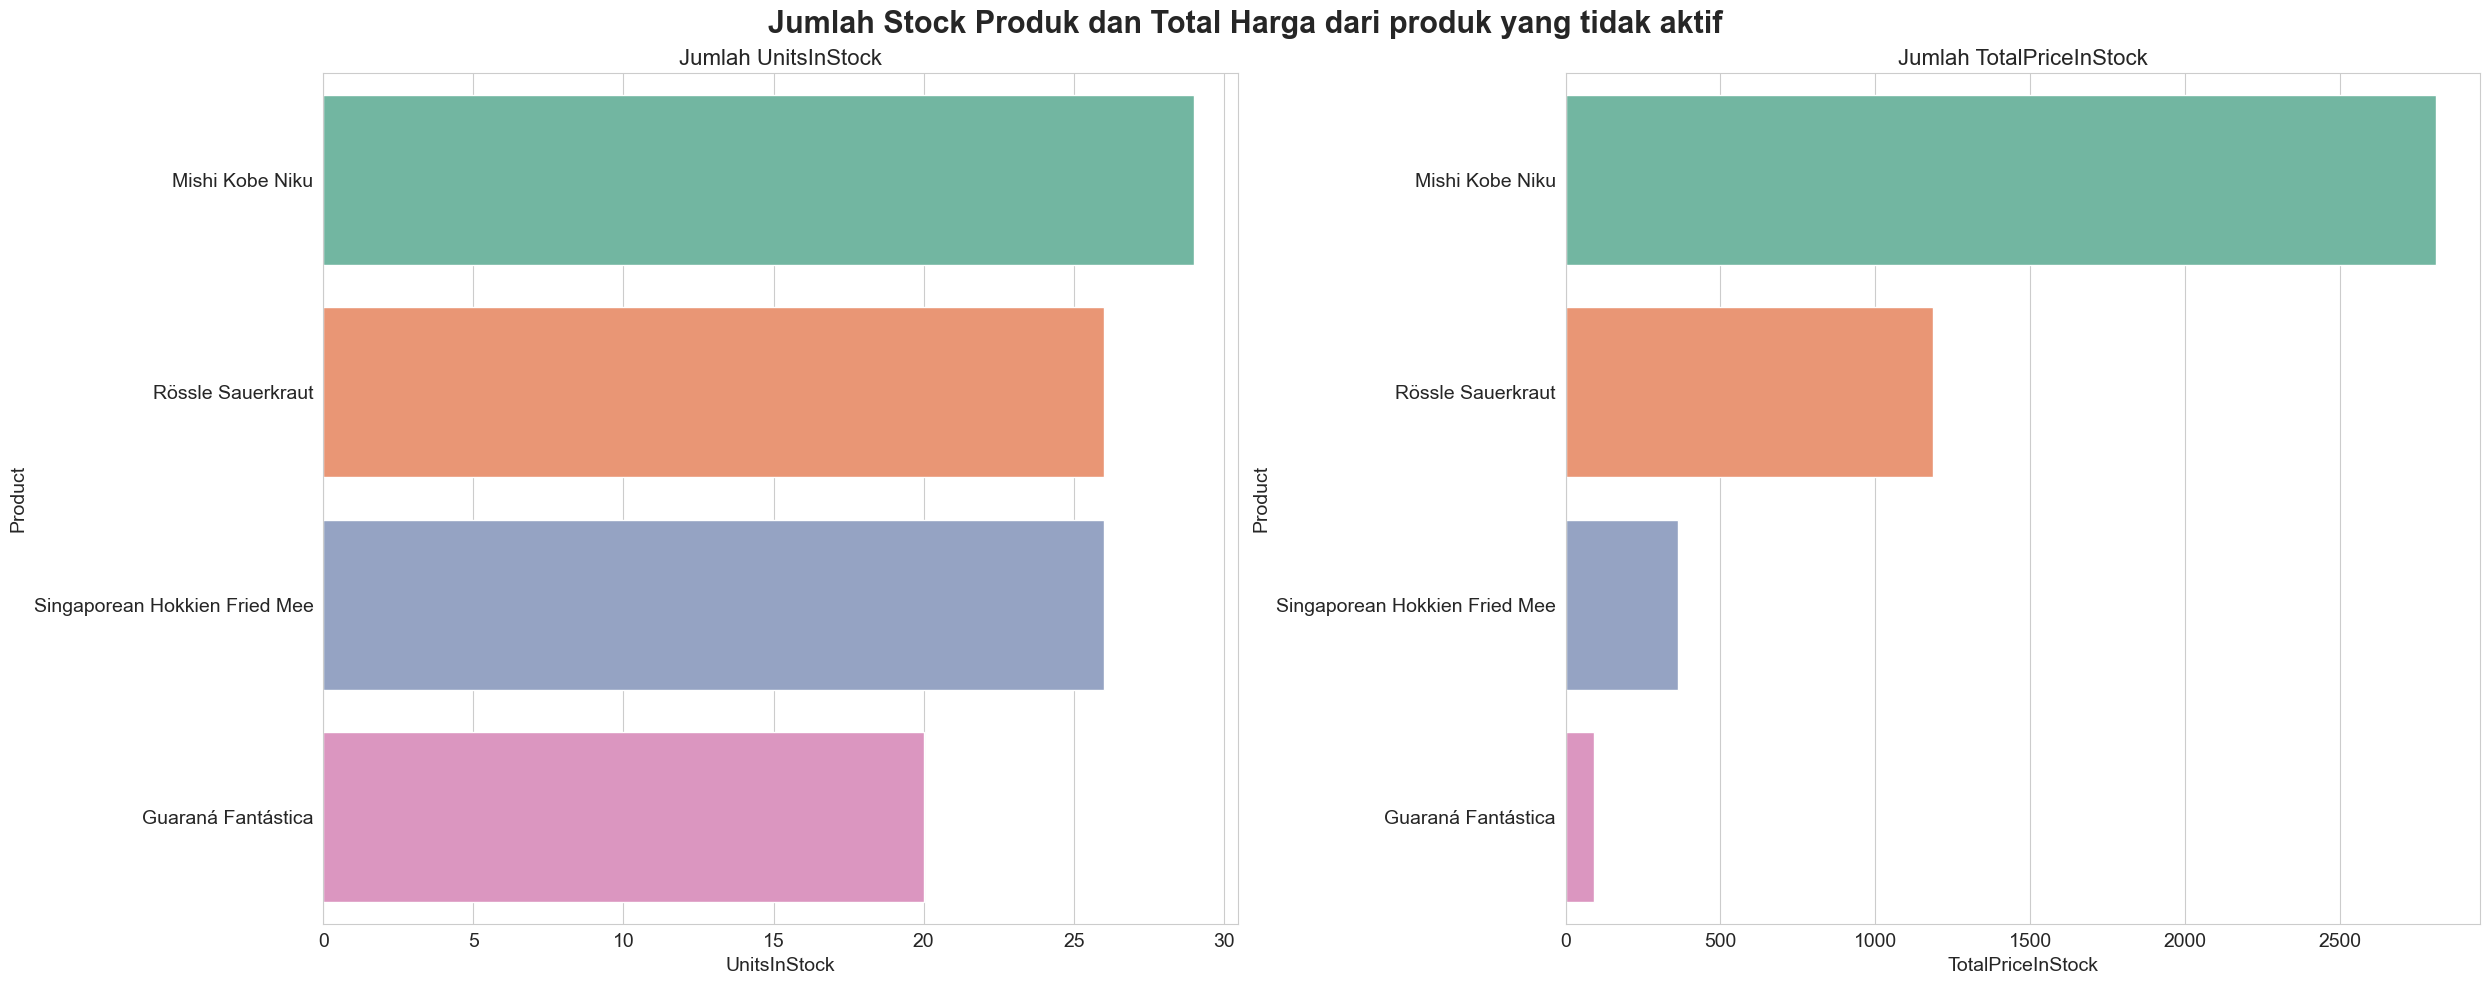

In [45]:
dead_stock_column = ['UnitsInStock', 'TotalPriceInStock']

plt.figure(figsize=(25,10))

for i, col in enumerate(dead_stock_column,1):
    plt.subplot(1,2,i)
    sns.barplot(data = dead_stock,
                y = 'ProductName',
                x = col,
                hue = 'ProductName',
                palette= 'Set2')
    
    plt.title(f'Jumlah {col}', fontsize = 16)
    plt.ylabel('Product', fontsize = 14)
    plt.xlabel(col, fontsize = 14)
    plt.yticks(fontsize = 14)


    plt.xticks(fontsize = 14)

plt.suptitle('Jumlah Stock Produk dan Total Harga dari produk yang tidak aktif', fontsize = 22, fontweight = 'bold')
plt.tight_layout()
plt.show()

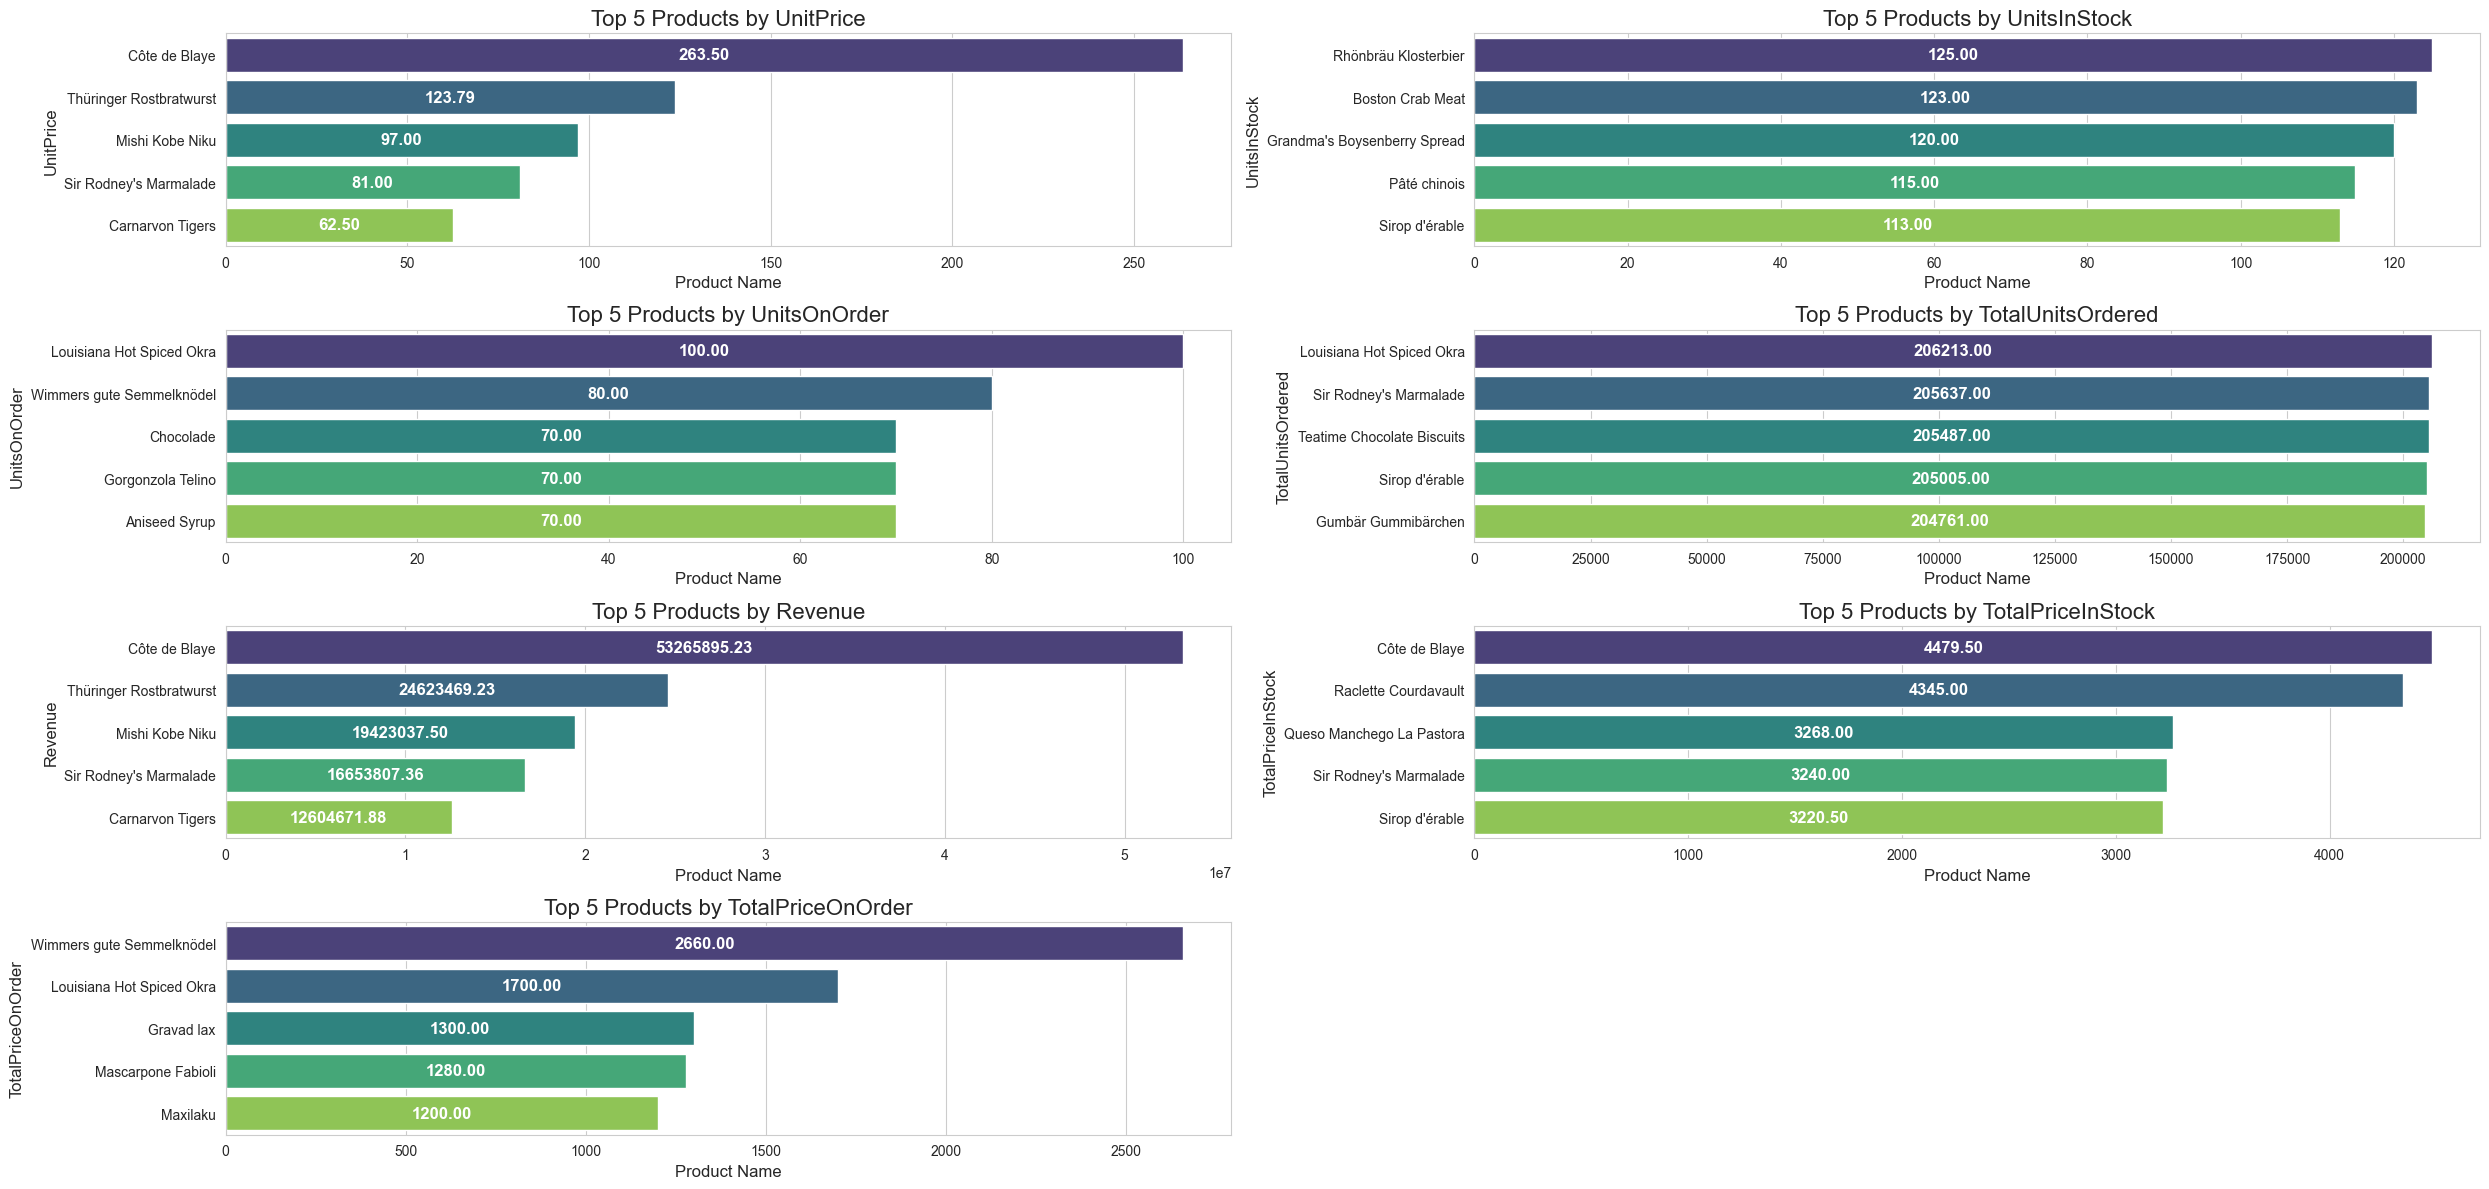

In [46]:
column_names = [
    'UnitPrice',
    'UnitsInStock',
    'UnitsOnOrder',
    'TotalUnitsOrdered',
    'Revenue',
    'TotalPriceInStock',
    'TotalPriceOnOrder'
]

plt.figure(figsize=(25,12))

for i, col in enumerate(column_names, 1):

    plt.subplot(4,2,i)

    top_5_products = df_product.nlargest(5, col).sort_values(by=col, ascending=False)

    sns.barplot(
        data=top_5_products,
        y='ProductName',
        x=col,
        hue='ProductName',
        palette='viridis',
        legend=False
    )

    plt.title(f'Top 5 Products by {col}', fontsize=16)
    plt.xlabel('Product Name', fontsize=12) 
    plt.ylabel(col, fontsize=12)

    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type= 'center', color = 'white', fontsize = 12, fontweight = 'bold')

plt.tight_layout()
plt.show()

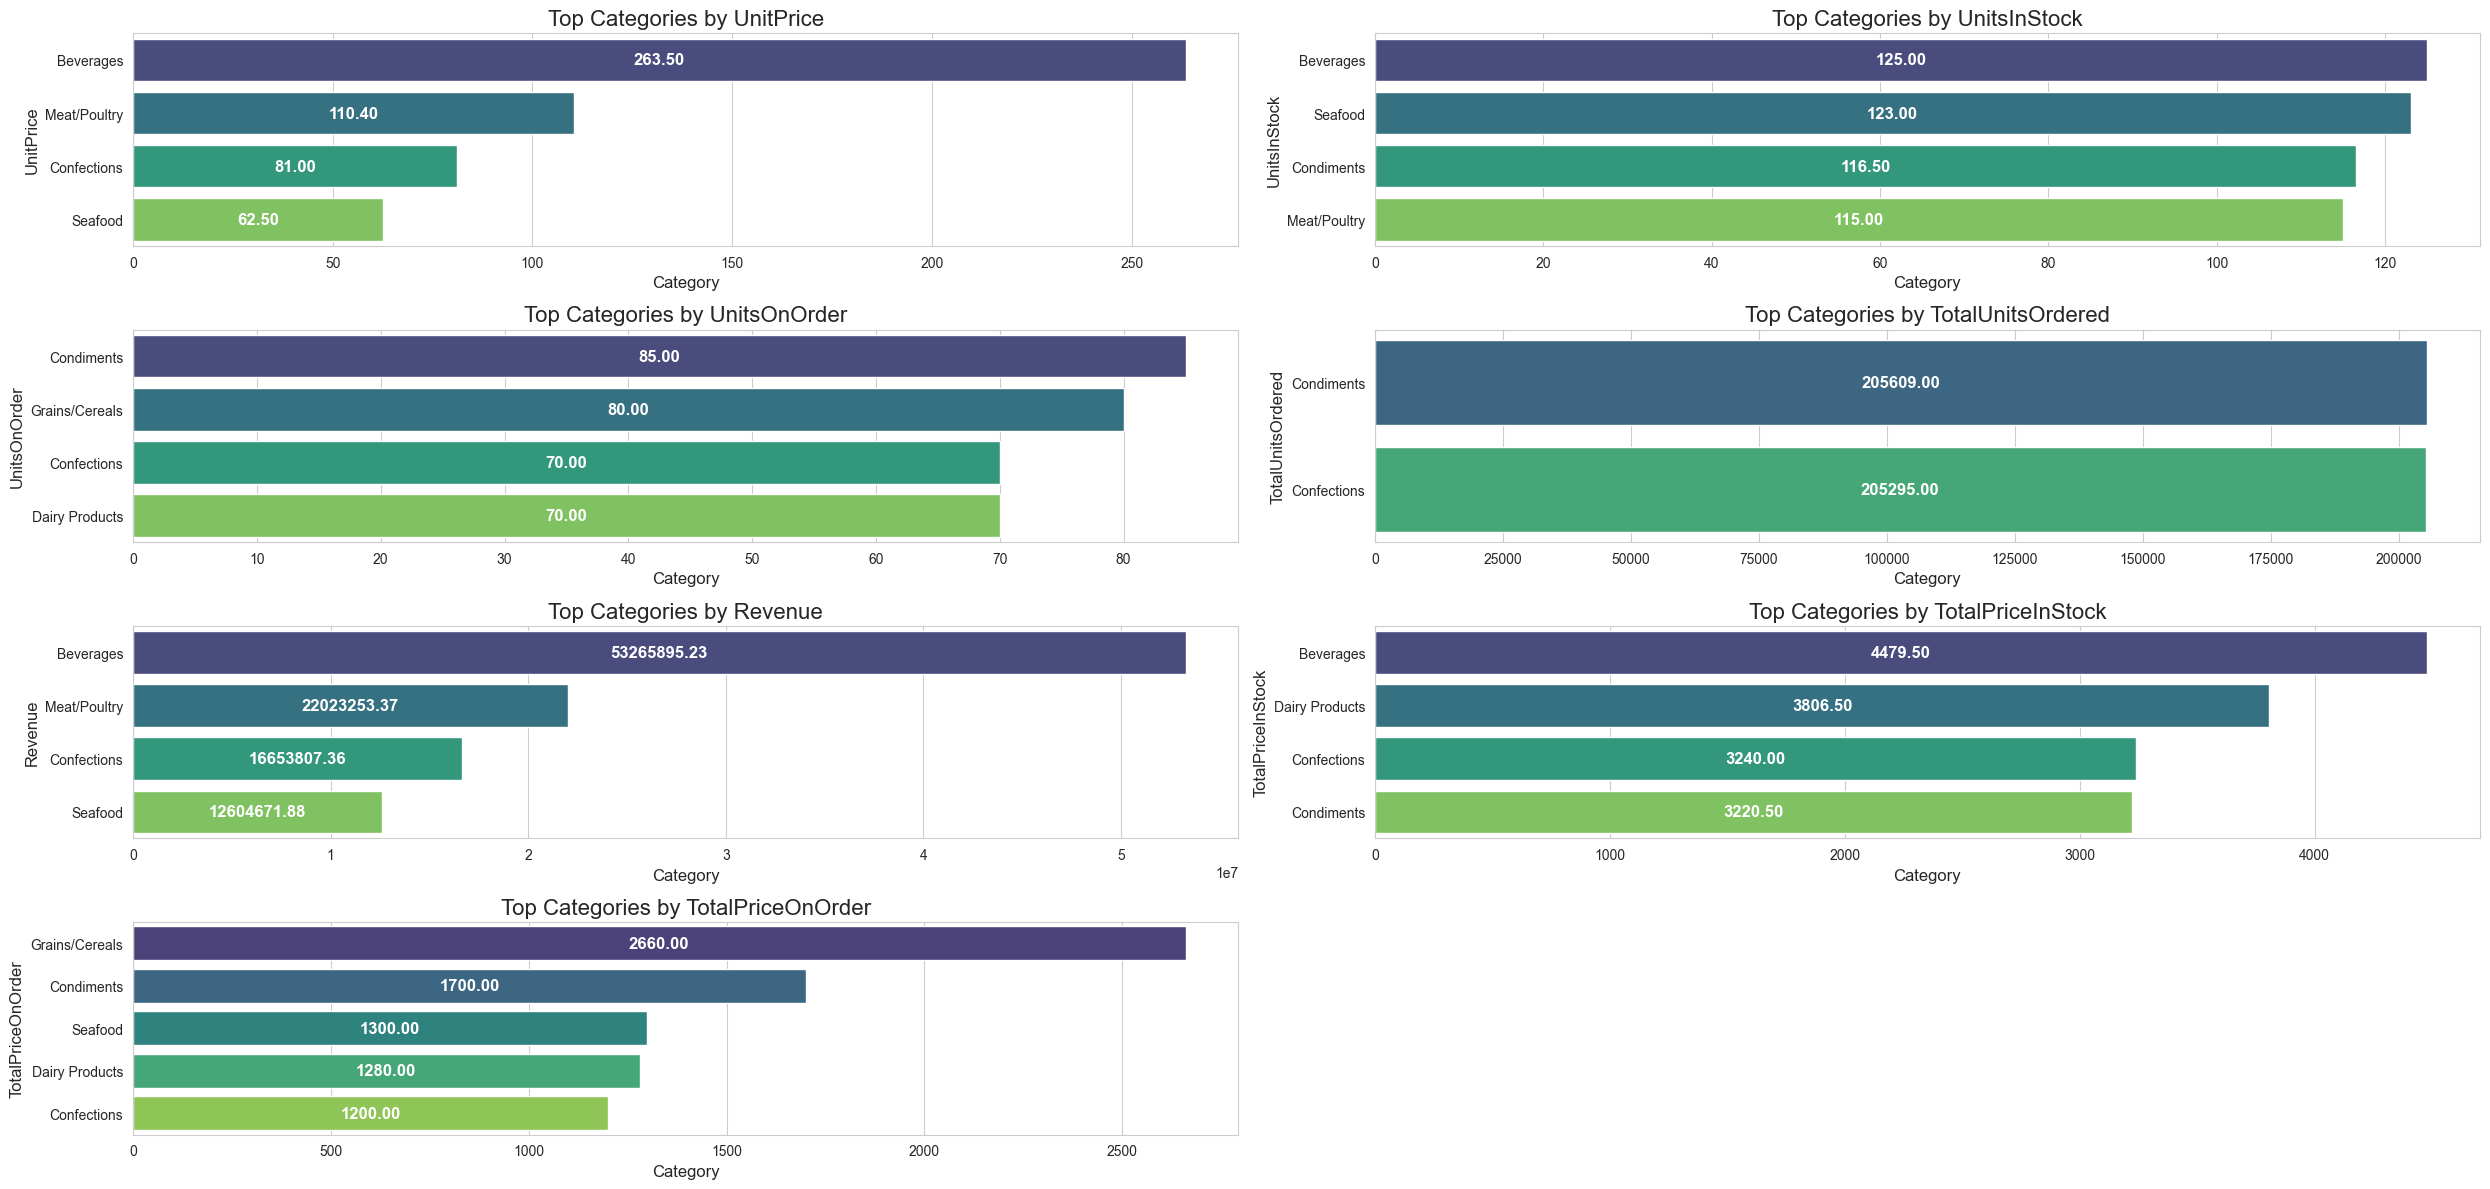

In [47]:
column_names = [
    'UnitPrice',
    'UnitsInStock',
    'UnitsOnOrder',
    'TotalUnitsOrdered',
    'Revenue',
    'TotalPriceInStock',
    'TotalPriceOnOrder'
]

plt.figure(figsize=(25,12)) 

for i, col in enumerate(column_names, 1):

    plt.subplot(4,2,i)

    top_categories = df_product.nlargest(5, col).sort_values(by=col, ascending=False)

    sns.barplot(
        data=top_categories,
        y='CategoryName',
        x=col,
        hue='CategoryName',
        palette='viridis',
        legend=False,
        errorbar= None
    )

    plt.title(f'Top Categories by {col}', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel(col, fontsize=12)

    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type= 'center', color = 'white', fontsize = 12, fontweight = 'bold')


plt.tight_layout()
plt.show()

In [48]:

scale_data = df_product.copy()

scale_data = scale_data.drop(columns= ['ProductID', 'ProductName', 'CategoryName', 'SupplierName'])

scaler = StandardScaler()

scale_data[scale_data.columns] = scaler.fit_transform(scale_data)

scale_data

pca = PCA(n_components= 5, random_state= 42)

pca_data = scale_data.copy()

pca_data = pca.fit_transform(scale_data)

pca_data



array([[-3.75106984e+00,  9.31742969e+00,  2.57699980e+00,
        -4.90574344e-01, -1.44001584e+00],
       [-2.00544295e+00,  3.67685601e+00, -3.02095736e+00,
        -1.63979409e+00,  2.76285285e-01],
       [-2.56740139e+00,  3.21878593e+00, -1.24440955e+00,
        -1.15183542e+00,  1.67628276e+00],
       [-1.96395898e+00,  2.42891518e+00,  1.33115609e+00,
         2.26200143e+00,  3.18398021e-01],
       [-1.82085334e+00,  1.38617747e+00,  5.17570194e-01,
         2.32685462e-01, -3.26414503e-01],
       [-2.28680219e+00,  1.35883318e+00,  2.10709612e+00,
         1.26814369e+00,  9.28694198e-01],
       [-9.98082397e-01,  7.47908713e-01, -2.06593572e-01,
        -1.07482774e-02, -8.71863257e-01],
       [-1.08075564e+00,  6.79995686e-01, -7.01576289e-01,
         6.39217804e-01, -8.79249396e-01],
       [ 1.96776059e+00,  1.16446018e+00,  6.31092525e-01,
         3.52311602e-01, -3.09367804e-01],
       [-1.50820406e+00,  1.11235268e+00, -1.94180757e+00,
         5.89063122e-01

In [49]:
num_clusters = np.arange(2,11)

def find_inertia_silhoutte_score(data, num_clusters):

    inertia = []
    sil_score = []

    for num in num_clusters:
        kmeans = KMeans(n_clusters= num, random_state=42, n_init= 100, init= 'k-means++').fit(data)
        inertia.append(kmeans.inertia_)
        sil_score.append(silhouette_score(data, kmeans.labels_))

    return inertia, sil_score

inertia, sil_score = find_inertia_silhoutte_score(pca_data, num_clusters)
    

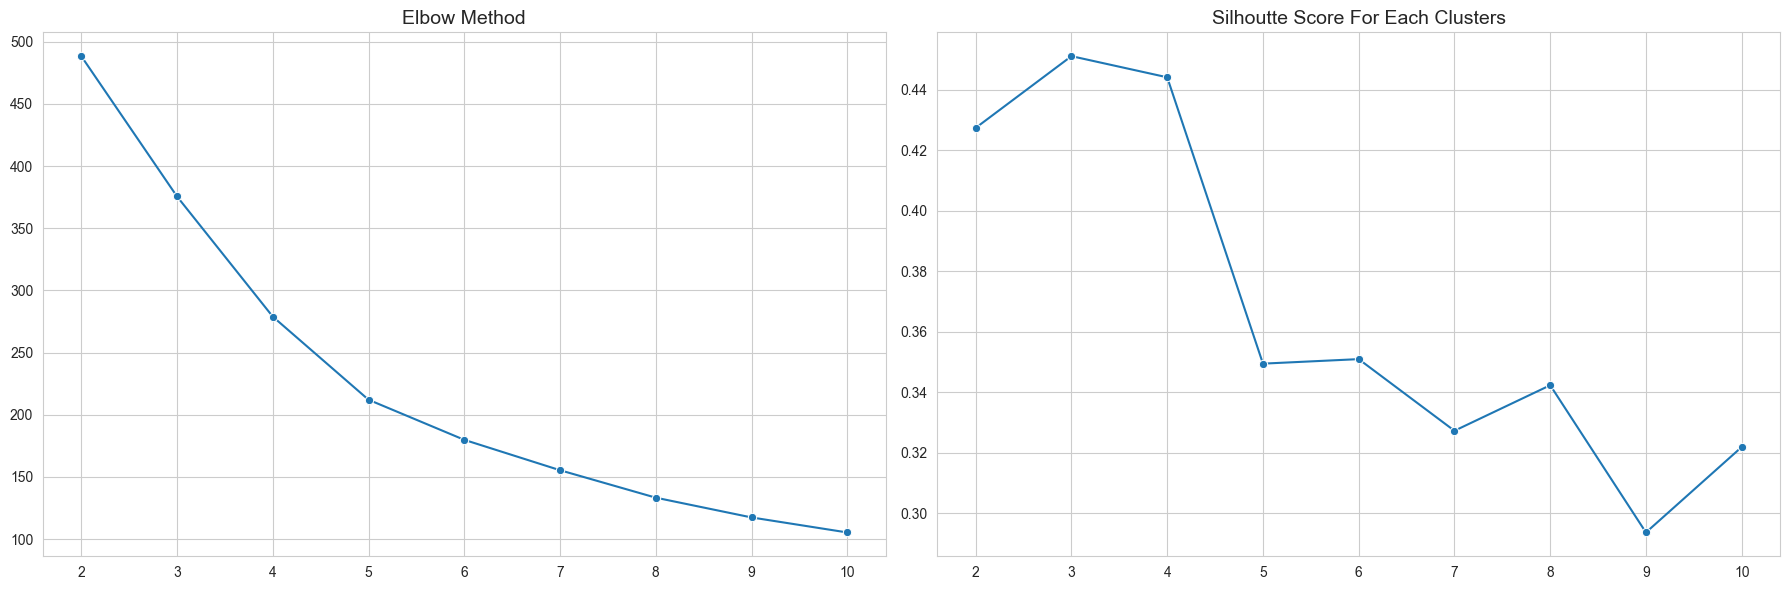

In [50]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.lineplot(x = num_clusters,
             y = inertia,
             marker = 'o')
plt.title('Elbow Method', fontsize = 14)

plt.subplot(1,2,2)
sns.lineplot(x = num_clusters,
             y = sil_score,
             marker = 'o')
plt.title('Silhoutte Score For Each Clusters', fontsize = 14)

plt.tight_layout()
plt.show()

In [51]:
kmeans_3 = KMeans(n_clusters= 3, random_state= 42, n_init= 100, init= 'k-means++')

df_product['Cluster'] = kmeans_3.fit_predict(pca_data)

df_product.groupby('Cluster').mean(numeric_only= True)

ProductID   UnitPrice  UnitsInStock  UnitsOnOrder  ReorderLevel  \
Cluster                                                                    
0        40.375000   20.906250     11.875000     47.500000     22.500000   
1        39.327586   24.205517     49.706897      0.344828     10.086207   
2        25.333333  161.430000     15.333333      0.000000      5.000000   

         Discontinued  TotalUnitsOrdered       Revenue  TotalPriceInStock  \
Cluster                                                                     
0            0.000000      202201.500000  4.221645e+06         289.828125   
1            0.103448      201756.482759  4.888412e+06        1071.053448   
2            0.666667      200500.666667  3.243747e+07        2430.833333   

         TotalPriceOnOrder  NeedRestock  RestockQuantityNeeded  
Cluster                                                         
0               886.093750     1.000000              10.625000  
1                 3.448276     0.034483               0.103448  
2                 0.000000     0.000000               0.000000

In [52]:
df_product['Product_Segment'] = df_product['Cluster'].map({
    0 : 'High Demand & Fast Move',
    1 : 'Mainstream',
    2 : 'Discontinued & Premium'   
})

df_product = df_product.drop(columns= 'Cluster')
df_product

ProductID              ProductName    CategoryName  \
0          38            Côte de Blaye       Beverages   
1          29  Thüringer Rostbratwurst    Meat/Poultry   
2           9          Mishi Kobe Niku    Meat/Poultry   
3          20   Sir Rodney's Marmalade     Confections   
4          18         Carnarvon Tigers         Seafood   
..        ...                      ...             ...   
72         54                Tourtière    Meat/Poultry   
73         52                 Filo Mix  Grains/Cereals   
74         13                    Konbu         Seafood   
75         24       Guaraná Fantástica       Beverages   
76         33                  Geitost  Dairy Products   

                         SupplierName  UnitPrice  UnitsInStock  UnitsOnOrder  \
0          Aux joyeux ecclésiastiques     263.50            17             0   
1   Plutzer Lebensmittelgroßmärkte AG     123.79             0             0   
2                       Tokyo Traders      97.00            29             0   
3            Specialty Biscuits, Ltd.      81.00            40             0   
4                       Pavlova, Ltd.      62.50            42             0   
..                                ...        ...           ...           ...   
72                          Ma Maison       7.45            21             0   
73                        G'day, Mate       7.00            38             0   
74                           Mayumi's       6.00            24             0   
75          Refrescos Americanas LTDA       4.50            20             0   
76                    Norske Meierier       2.50           112             0   

    ReorderLevel  Discontinued  TotalUnitsOrdered       Revenue  \
0             15             0             202234  5.326590e+07   
1              0             1             199010  2.462347e+07   
2              0             1             200258  1.942304e+07   
3              0             0             205637  1.665381e+07   
4              0             0             201747  1.260467e+07   
..           ...           ...                ...           ...   
72            10             0             202688  1.509129e+06   
73            25             0             203091  1.421370e+06   
74             5             0             202499  1.214608e+06   
75             0             1             201959  9.082574e+05   
76            20             0             202944  5.071206e+05   

    TotalPriceInStock  TotalPriceOnOrder  NeedRestock  RestockQuantityNeeded  \
0             4479.50                0.0            0                      0   
1                0.00                0.0            0                      0   
2             2813.00                0.0            0                      0   
3             3240.00                0.0            0                      0   
4             2625.00                0.0            0                      0   
..                ...                ...          ...                    ...   
72             156.45                0.0            0                      0   
73             266.00                0.0            0                      0   
74             144.00                0.0            0                      0   
75              90.00                0.0            0                      0   
76             280.00                0.0            0                      0   

           Product_Segment  
0   Discontinued & Premium  
1   Discontinued & Premium  
2   Discontinued & Premium  
3               Mainstream  
4               Mainstream  
..                     ...  
72              Mainstream  
73              Mainstream  
74              Mainstream  
75              Mainstream  
76              Mainstream  

[77 rows x 16 columns]

In [53]:
df_product.to_csv('Product_Inventory_New.csv')

In [54]:
'''sales_metrics = ['Unit_Price', 'Quantity', 'Discount', 'Total_Sales']

corr = df_employee[sales_metrics].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()'''

'sales_metrics = [\'Unit_Price\', \'Quantity\', \'Discount\', \'Total_Sales\']\n\ncorr = df_employee[sales_metrics].corr()\n\nplt.figure(figsize=(8, 6))\nsns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)\nplt.title("Correlation Matrix")\nplt.show()'

In [55]:
'''reg_data = df_employee.copy()

reg_data = reg_data.drop(columns= ['OrderID', 'EmployeeID', 'Sales_Name', 'Title', 'Customer_Name', 'OrderDate', 'ShippedDate', 'Order_Month', 'Order_Year', 'Year_Month'])
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_vif = df_employee

vif = [variance_inflation_factor(data_vif,i) for i in range(data_vif.shape[1])]

df_x = reg_data.copy()
df_x.drop(columns= ['Product', 'Category', 'Total_Sales'], inplace= True)

df_y = reg_data[['Total_Sales']]

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state= 42, test_size= 0.3)

ols_formula = 'Total_Sales ~ Unit_Price + Quantity + Discount'

ols_data = pd.concat([x_train, y_train], axis= 1)

model = ols(data = ols_data, formula= ols_formula).fit()

model.summary()'''



"reg_data = df_employee.copy()\n\nreg_data = reg_data.drop(columns= ['OrderID', 'EmployeeID', 'Sales_Name', 'Title', 'Customer_Name', 'OrderDate', 'ShippedDate', 'Order_Month', 'Order_Year', 'Year_Month'])\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\ndata_vif = df_employee\n\nvif = [variance_inflation_factor(data_vif,i) for i in range(data_vif.shape[1])]\n\ndf_x = reg_data.copy()\ndf_x.drop(columns= ['Product', 'Category', 'Total_Sales'], inplace= True)\n\ndf_y = reg_data[['Total_Sales']]\n\nx_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state= 42, test_size= 0.3)\n\nols_formula = 'Total_Sales ~ Unit_Price + Quantity + Discount'\n\nols_data = pd.concat([x_train, y_train], axis= 1)\n\nmodel = ols(data = ols_data, formula= ols_formula).fit()\n\nmodel.summary()"

# Sales Performance

In [56]:
df_employee = pd.read_csv('Sales_Performance.csv', index_col = 0).reset_index()

df_employee.head()

OrderID  EmployeeID       Sales_Name                 Title  \
0    10248           5  Steven Buchanan         Sales Manager   
1    10248           5  Steven Buchanan         Sales Manager   
2    10248           5  Steven Buchanan         Sales Manager   
3    10249           6   Michael Suyama  Sales Representative   
4    10249           6   Michael Suyama  Sales Representative   

               Customer_Name   OrderDate ShippedDate  \
0  Vins et alcools Chevalier  2016-07-04  2016-07-16   
1  Vins et alcools Chevalier  2016-07-04  2016-07-16   
2  Vins et alcools Chevalier  2016-07-04  2016-07-16   
3         Toms Spezialitäten  2016-07-05  2016-07-10   
4         Toms Spezialitäten  2016-07-05  2016-07-10   

                         Product        Category  Unit_Price  Quantity  \
0                 Queso Cabrales  Dairy Products        14.0        12   
1  Singaporean Hokkien Fried Mee  Grains/Cereals         9.8        10   
2         Mozzarella di Giovanni  Dairy Products        34.8         5   
3                           Tofu         Produce        18.6         9   
4          Manjimup Dried Apples         Produce        42.4        40   

   Discount  Total_Sales  
0       0.0        168.0  
1       0.0         98.0  
2       0.0        174.0  
3       0.0        167.4  
4       0.0       1696.0

In [57]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609283 entries, 0 to 609282
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OrderID        609283 non-null  int64  
 1   EmployeeID     609283 non-null  int64  
 2   Sales_Name     609283 non-null  object 
 3   Title          609283 non-null  object 
 4   Customer_Name  609283 non-null  object 
 5   OrderDate      609283 non-null  object 
 6   ShippedDate    609210 non-null  object 
 7   Product        609283 non-null  object 
 8   Category       609283 non-null  object 
 9   Unit_Price     609283 non-null  float64
 10  Quantity       609283 non-null  int64  
 11  Discount       609283 non-null  float64
 12  Total_Sales    609283 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 60.4+ MB


In [58]:
df_employee.describe()

OrderID     EmployeeID     Unit_Price       Quantity  \
count  609283.000000  609283.000000  609283.000000  609283.000000   
mean    18785.560685       4.987902      28.850379      25.503095   
std      4484.093759       2.570557      33.565470      14.453939   
min     10248.000000       1.000000       2.000000       1.000000   
25%     14907.000000       3.000000      13.250000      13.000000   
50%     18789.000000       5.000000      19.500000      25.000000   
75%     22681.000000       7.000000      33.250000      38.000000   
max     26529.000000       9.000000     263.500000     130.000000   

            Discount    Total_Sales  
count  609283.000000  609283.000000  
mean        0.000199     735.925068  
std         0.005978    1069.479150  
min         0.000000       2.500000  
25%         0.000000     216.000000  
50%         0.000000     462.000000  
75%         0.000000     864.800000  
max         0.250000   15810.000000

In [59]:
df_employee.shape

(609283, 13)

In [60]:
df_employee.isnull().sum()

OrderID           0
EmployeeID        0
Sales_Name        0
Title             0
Customer_Name     0
OrderDate         0
ShippedDate      73
Product           0
Category          0
Unit_Price        0
Quantity          0
Discount          0
Total_Sales       0
dtype: int64

In [61]:
missing_data= df_employee[df_employee.isnull().any(axis=1)]

print(f'Terdapat {len(missing_data)} data yang memiliki missing values dan akan dihapus')

df_employee.dropna(subset= ['ShippedDate'], inplace= True)

Terdapat 73 data yang memiliki missing values dan akan dihapus


In [62]:
df_employee.isnull().sum()

OrderID          0
EmployeeID       0
Sales_Name       0
Title            0
Customer_Name    0
OrderDate        0
ShippedDate      0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Sales      0
dtype: int64

In [63]:
# Mengubah tipe data OrderDate & ShippedDate menjadi format DateTime

column_dates = ['OrderDate', 'ShippedDate']

for col in column_dates:
    df_employee[col] = df_employee[col].astype(str).str[:10]
    df_employee[col] = pd.to_datetime(df_employee[col], format= '%Y-%m-%d')

df_employee['Order_Month'] = df_employee['OrderDate'].dt.month_name()
df_employee['Order_Year'] = df_employee['OrderDate'].dt.year
df_employee['Year_Month'] = df_employee['OrderDate'].dt.strftime('%Y-%m')

df_employee

OrderID  EmployeeID       Sales_Name                 Title  \
0         10248           5  Steven Buchanan         Sales Manager   
1         10248           5  Steven Buchanan         Sales Manager   
2         10248           5  Steven Buchanan         Sales Manager   
3         10249           6   Michael Suyama  Sales Representative   
4         10249           6   Michael Suyama  Sales Representative   
...         ...         ...              ...                   ...   
609278    26529           6   Michael Suyama  Sales Representative   
609279    26529           6   Michael Suyama  Sales Representative   
609280    26529           6   Michael Suyama  Sales Representative   
609281    26529           6   Michael Suyama  Sales Representative   
609282    26529           6   Michael Suyama  Sales Representative   

                    Customer_Name  OrderDate ShippedDate  \
0       Vins et alcools Chevalier 2016-07-04  2016-07-16   
1       Vins et alcools Chevalier 2016-07-04  2016-07-16   
2       Vins et alcools Chevalier 2016-07-04  2016-07-16   
3              Toms Spezialitäten 2016-07-05  2016-07-10   
4              Toms Spezialitäten 2016-07-05  2016-07-10   
...                           ...        ...         ...   
609278            Du monde entier 2023-01-10  2023-01-10   
609279            Du monde entier 2023-01-10  2023-01-10   
609280            Du monde entier 2023-01-10  2023-01-10   
609281            Du monde entier 2023-01-10  2023-01-10   
609282            Du monde entier 2023-01-10  2023-01-10   

                                Product        Category  Unit_Price  Quantity  \
0                        Queso Cabrales  Dairy Products       14.00        12   
1         Singaporean Hokkien Fried Mee  Grains/Cereals        9.80        10   
2                Mozzarella di Giovanni  Dairy Products       34.80         5   
3                                  Tofu         Produce       18.60         9   
4                 Manjimup Dried Apples         Produce       42.40        40   
...                                 ...             ...         ...       ...   
609278                       Röd Kaviar         Seafood       15.00        38   
609279                    Longlife Tofu         Produce       10.00         3   
609280             Rhönbräu Klosterbier       Beverages        7.75        19   
609281                     Lakkalikööri       Beverages       18.00        33   
609282  Original Frankfurter grüne Soße      Condiments       13.00         4   

        Discount  Total_Sales Order_Month  Order_Year Year_Month  
0            0.0       168.00        July        2016    2016-07  
1            0.0        98.00        July        2016    2016-07  
2            0.0       174.00        July        2016    2016-07  
3            0.0       167.40        July        2016    2016-07  
4            0.0      1696.00        July        2016    2016-07  
...          ...          ...         ...         ...        ...  
609278       0.0       570.00     January        2023    2023-01  
609279       0.0        30.00     January        2023    2023-01  
609280       0.0       147.25     January        2023    2023-01  
609281       0.0       594.00     January        2023    2023-01  
609282       0.0        52.00     January        2023    2023-01  

[609210 rows x 16 columns]

In [64]:
monthly_sales_report = df_employee.groupby(['EmployeeID', 'Sales_Name', 'Title', 'Year_Month']).agg({
    'OrderID' : 'nunique',
    'Customer_Name' : 'nunique',
    'Product' : 'count',
    'Category' : 'nunique',
    'Quantity' : 'sum',
    'Total_Sales' : ['sum', 'mean']
}).reset_index()

monthly_sales_report.columns = ['EmployeeID', 'Sales_Name', 'Title',  'Year_Month', 'Orders_Handled', 'Total_Customer', 'Total_Product_Sold', 'Total_Category_Sold', 'Total_Quantity_Sold', 'Total_Sales', 'Average_Sales']

monthly_sales_report.sort_values('Total_Sales', ascending= False, inplace= True)
monthly_sales_report.reset_index(inplace= True, drop= True)

monthly_sales_report.head(20)

EmployeeID        Sales_Name                     Title Year_Month  \
0            8    Laura Callahan  Inside Sales Coordinator    2016-05   
1            3   Janet Leverling      Sales Representative    2013-12   
2            7       Robert King      Sales Representative    2020-08   
3            5   Steven Buchanan             Sales Manager    2023-07   
4            3   Janet Leverling      Sales Representative    2016-07   
5            4  Margaret Peacock      Sales Representative    2020-09   
6            4  Margaret Peacock      Sales Representative    2014-12   
7            4  Margaret Peacock      Sales Representative    2019-05   
8            4  Margaret Peacock      Sales Representative    2021-12   
9            9    Anne Dodsworth      Sales Representative    2013-07   
10           7       Robert King      Sales Representative    2014-01   
11           8    Laura Callahan  Inside Sales Coordinator    2015-08   
12           4  Margaret Peacock      Sales Representative    2015-12   
13           4  Margaret Peacock      Sales Representative    2013-07   
14           9    Anne Dodsworth      Sales Representative    2016-01   
15           5   Steven Buchanan             Sales Manager    2016-03   
16           7       Robert King      Sales Representative    2015-03   
17           4  Margaret Peacock      Sales Representative    2021-02   
18           9    Anne Dodsworth      Sales Representative    2022-11   
19           4  Margaret Peacock      Sales Representative    2017-05   

    Orders_Handled  Total_Customer  Total_Product_Sold  Total_Category_Sold  \
0               25              24                1178                    8   
1               19              17                 985                    8   
2               26              23                1017                    8   
3               19              18                1023                    8   
4               23              22                 966                    8   
5               20              17                 970                    8   
6               24              22                 929                    8   
7               23              18                 908                    8   
8               19              17                 955                    8   
9               23              22                 954                    8   
10              23              22                 849                    8   
11              20              19                 917                    8   
12              22              19                 850                    8   
13              18              15                 913                    8   
14              20              19                 823                    8   
15              18              18                 876                    8   
16              21              18                 883                    8   
17              19              17                 874                    8   
18              18              16                 829                    8   
19              24              21                 888                    8   

    Total_Quantity_Sold  Total_Sales  Average_Sales  
0                 29380   867720.250     736.604626  
1                 25733   755028.320     766.526213  
2                 25770   730154.920     717.949774  
3                 25786   726352.170     710.021672  
4                 24938   714059.480     739.192008  
5                 24701   701766.110     723.470216  
6                 24147   698101.900     751.455221  
7                 23829   691594.110     761.667522  
8                 23956   689620.740     722.115958  
9                 24358   686016.530     719.094895  
10                22644   677745.900     798.287279  
11                23999   671391.860     732.161243  
12                21893   669412.990     787.544694  
13                23167   665886.910     729.339441  


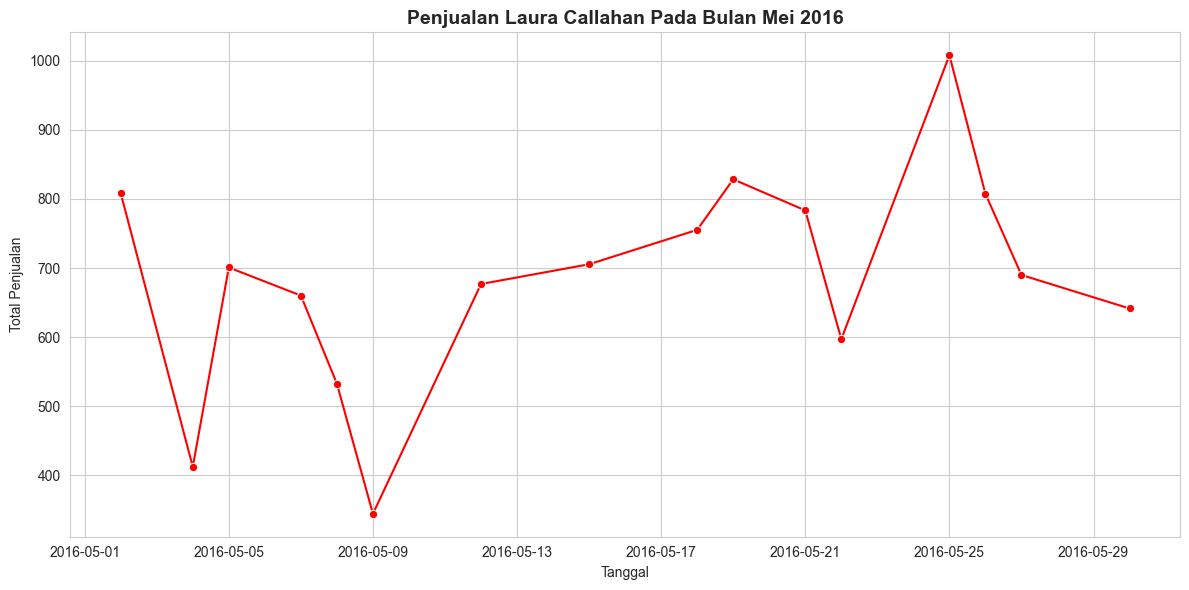

In [65]:
top_perform_laura = df_employee[(df_employee['Sales_Name'] == 'Laura Callahan') & (df_employee['Year_Month'] == '2016-05')]

plt.figure(figsize=(12,6))

sns.lineplot(data = top_perform_laura,
             x = 'OrderDate',
             y = 'Total_Sales',
             errorbar= None,
             marker = 'o',
             color = 'red')

plt.title('Penjualan Laura Callahan Pada Bulan Mei 2016', fontsize = 14, fontweight = 'bold')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')

plt.tight_layout()
plt.show()



In [66]:
yearly_sales_report = df_employee.groupby(['EmployeeID', 'Sales_Name', 'Title', 'Order_Year']).agg({
    'OrderID' : 'nunique',
    'Customer_Name' : 'nunique',
    'Product' : 'count',
    'Category' : 'nunique',
    'Quantity' : 'sum',
    'Total_Sales' : ['sum', 'mean']
}).reset_index()

yearly_sales_report.columns = ['EmployeeID', 'Sales_Name', 'Title',  'Order_Year', 'Orders_Handled', 'Total_Customer', 'Total_Product_Sold', 'Total_Category_Sold', 'Total_Quantity_Sold', 'Total_Sales', 'Average_Sales']

yearly_sales_report.sort_values('Total_Sales', ascending= False, inplace= True)
yearly_sales_report.reset_index(inplace= True, drop= True)

yearly_sales_report

EmployeeID        Sales_Name                     Title  Order_Year  \
0             4  Margaret Peacock      Sales Representative        2021   
1             1     Nancy Davolio      Sales Representative        2013   
2             8    Laura Callahan  Inside Sales Coordinator        2015   
3             8    Laura Callahan  Inside Sales Coordinator        2016   
4             7       Robert King      Sales Representative        2015   
..          ...               ...                       ...         ...   
103           6    Michael Suyama      Sales Representative        2012   
104           4  Margaret Peacock      Sales Representative        2012   
105           1     Nancy Davolio      Sales Representative        2012   
106           7       Robert King      Sales Representative        2012   
107           8    Laura Callahan  Inside Sales Coordinator        2012   

     Orders_Handled  Total_Customer  Total_Product_Sold  Total_Category_Sold  \
0               176              81                7481                    8   
1               177              83                7331                    8   
2               190              81                7323                    8   
3               191              81                7290                    8   
4               174              76                7042                    8   
..              ...             ...                 ...                  ...   
103              77              55                2670                    8   
104              69              48                2620                    8   
105              74              44                2477                    8   
106              61              41                2392                    8   
107              57              43                2347                    8   

     Total_Quantity_Sold  Total_Sales  Average_Sales  
0                 190408   5570857.60     744.667504  
1                 186752   5472859.56     746.536565  
2                 187545   5384014.22     735.219749  
3                 184615   5290581.92     725.731402  
4                 178598   5064518.90     719.187575  
..                   ...          ...            ...  
103                68768   1953878.90     731.789850  
104                67777   1921607.91     733.438134  
105                64059   1821344.51     735.302588  
106                60674   1743288.51     728.799544  
107                59934   1728001.01     736.259484  

[108 rows x 11 columns]

In [67]:
yearly_sales_report['Revenue_per_Order'] = (yearly_sales_report['Total_Sales'] / yearly_sales_report['Orders_Handled']).round(2)
yearly_sales_report['Revenue_per_Customer'] = (yearly_sales_report['Total_Sales'] / yearly_sales_report['Total_Customer']).round(2)
yearly_sales_report['Quantity_per_Order'] = (yearly_sales_report['Total_Quantity_Sold'] / yearly_sales_report['Orders_Handled']).round(2)


In [68]:
yearly_sales_report

EmployeeID        Sales_Name                     Title  Order_Year  \
0             4  Margaret Peacock      Sales Representative        2021   
1             1     Nancy Davolio      Sales Representative        2013   
2             8    Laura Callahan  Inside Sales Coordinator        2015   
3             8    Laura Callahan  Inside Sales Coordinator        2016   
4             7       Robert King      Sales Representative        2015   
..          ...               ...                       ...         ...   
103           6    Michael Suyama      Sales Representative        2012   
104           4  Margaret Peacock      Sales Representative        2012   
105           1     Nancy Davolio      Sales Representative        2012   
106           7       Robert King      Sales Representative        2012   
107           8    Laura Callahan  Inside Sales Coordinator        2012   

     Orders_Handled  Total_Customer  Total_Product_Sold  Total_Category_Sold  \
0               176              81                7481                    8   
1               177              83                7331                    8   
2               190              81                7323                    8   
3               191              81                7290                    8   
4               174              76                7042                    8   
..              ...             ...                 ...                  ...   
103              77              55                2670                    8   
104              69              48                2620                    8   
105              74              44                2477                    8   
106              61              41                2392                    8   
107              57              43                2347                    8   

     Total_Quantity_Sold  Total_Sales  Average_Sales  Revenue_per_Order  \
0                 190408   5570857.60     744.667504           31652.60   
1                 186752   5472859.56     746.536565           30920.11   
2                 187545   5384014.22     735.219749           28336.92   
3                 184615   5290581.92     725.731402           27699.38   
4                 178598   5064518.90     719.187575           29106.43   
..                   ...          ...            ...                ...   
103                68768   1953878.90     731.789850           25375.05   
104                67777   1921607.91     733.438134           27849.39   
105                64059   1821344.51     735.302588           24612.76   
106                60674   1743288.51     728.799544           28578.50   
107                59934   1728001.01     736.259484           30315.81   

     Revenue_per_Customer  Quantity_per_Order  
0                68776.02             1081.86  
1                65938.07             1055.10  
2                66469.31              987.08  
3                65315.83              966.57  
4                66638.41             1026.43  
..                    ...                 ...  
103              35525.07              893.09  
104              40033.50              982.28  
105              41394.19              865.66  
106              42519.23              994.66  
107              40186.07             1051.47  

[108 rows x 14 columns]

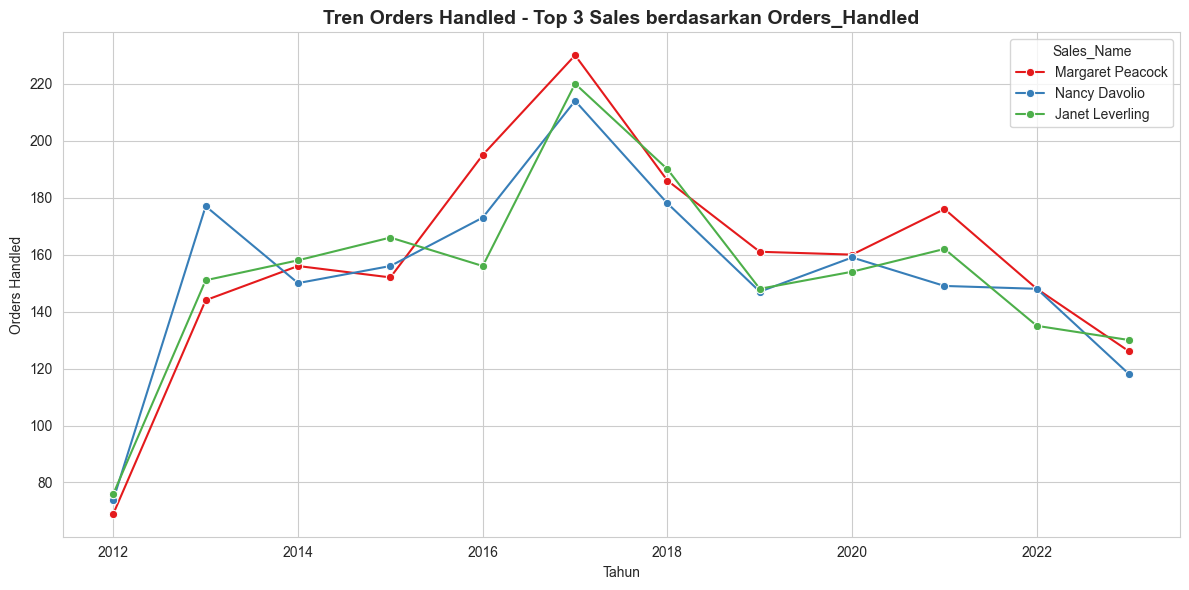

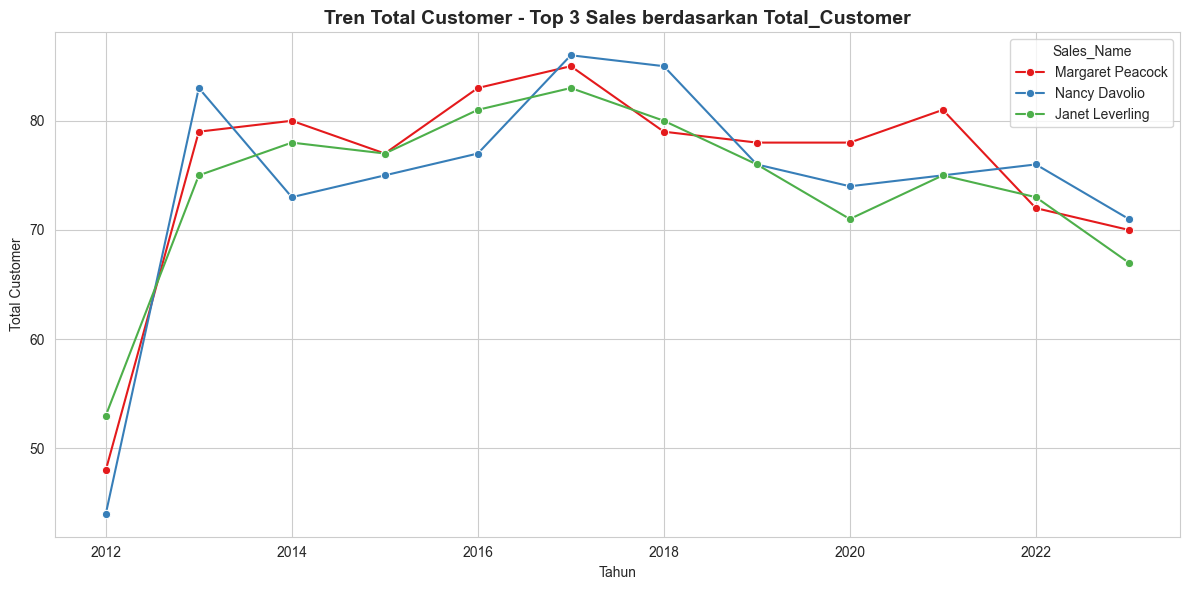

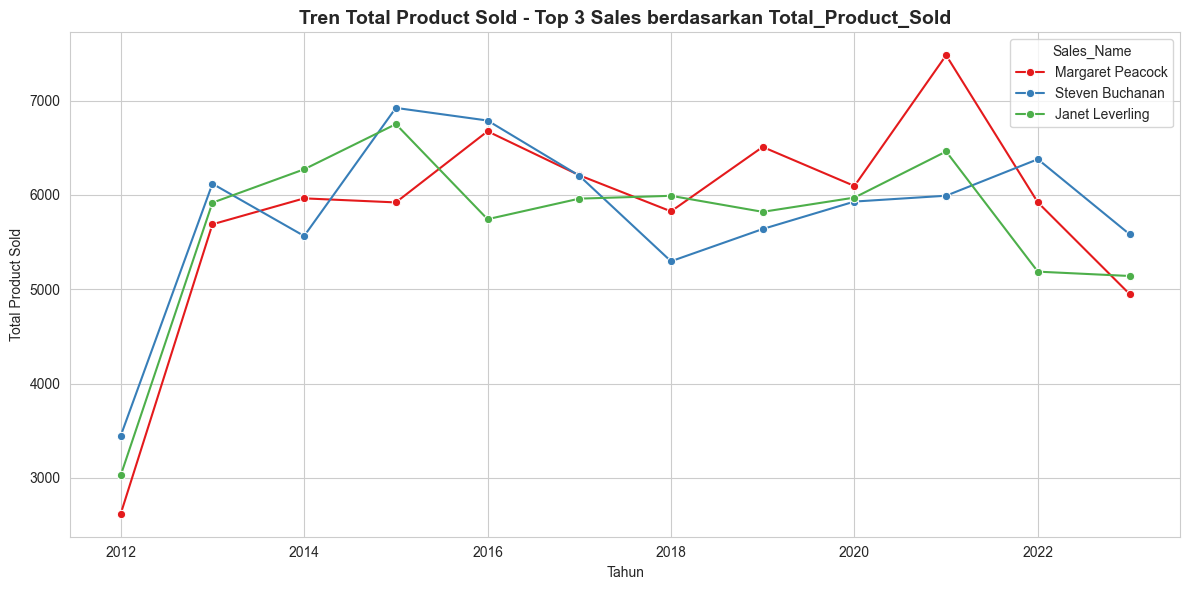

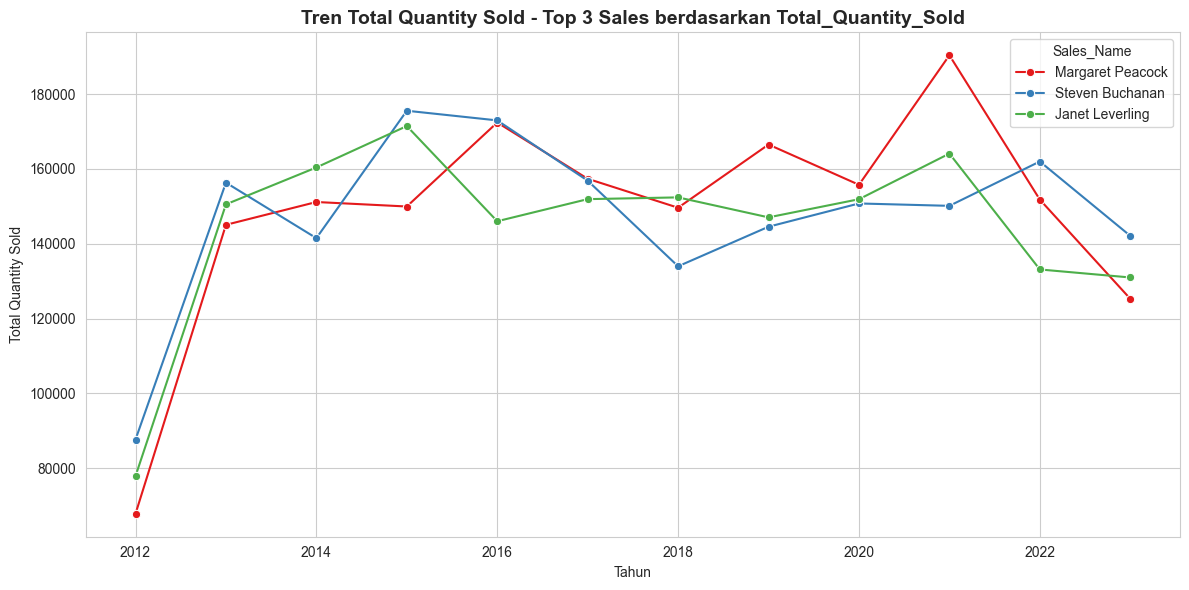

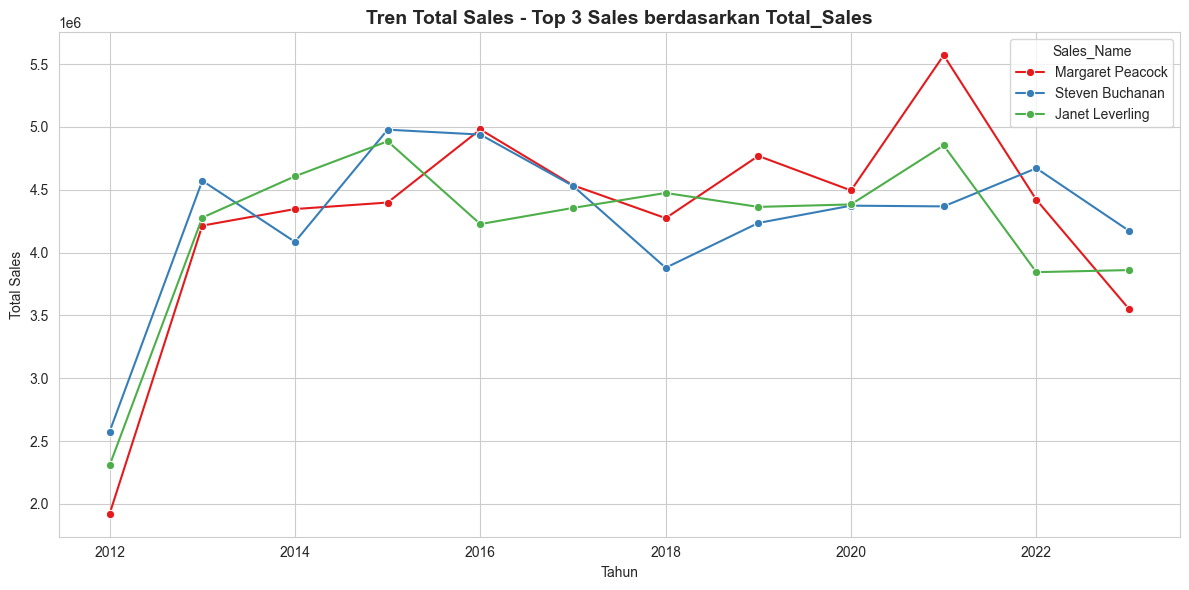

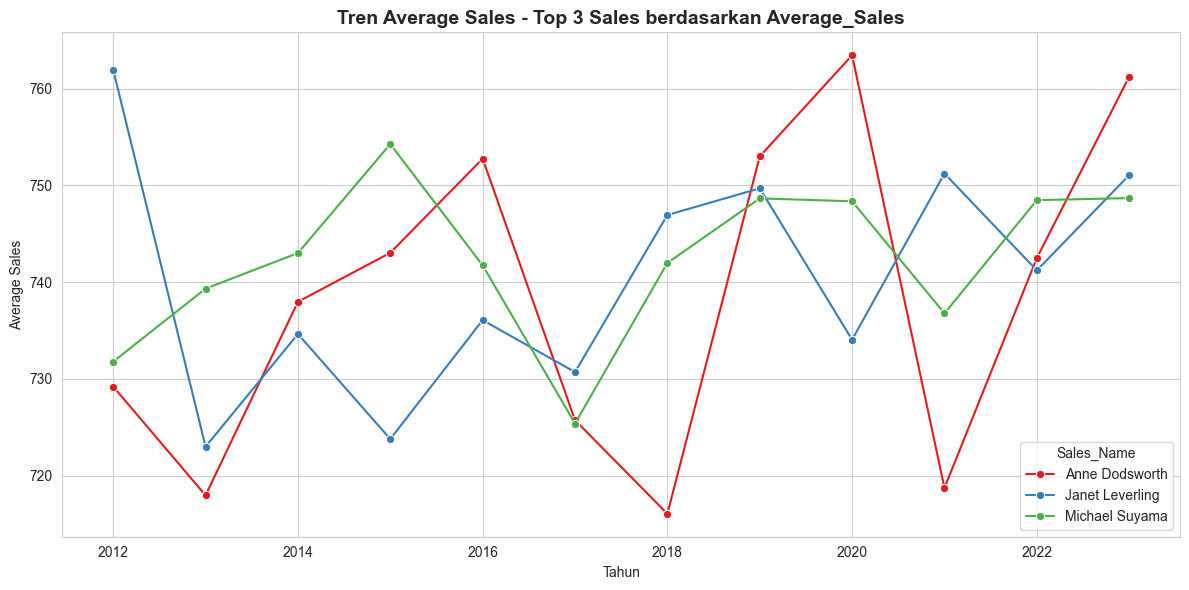

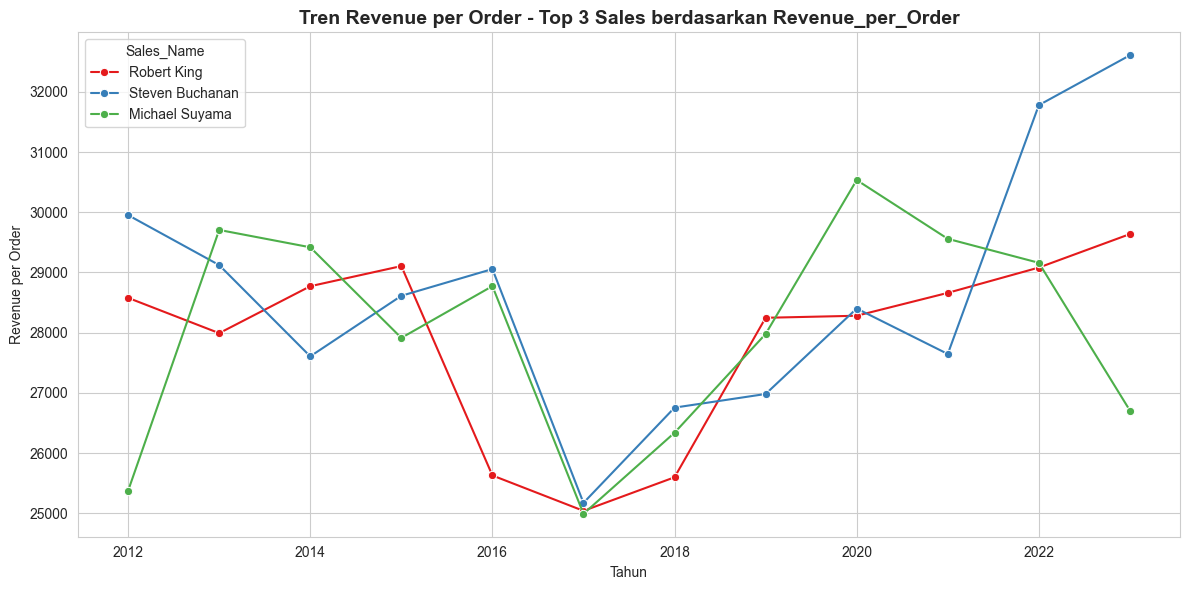

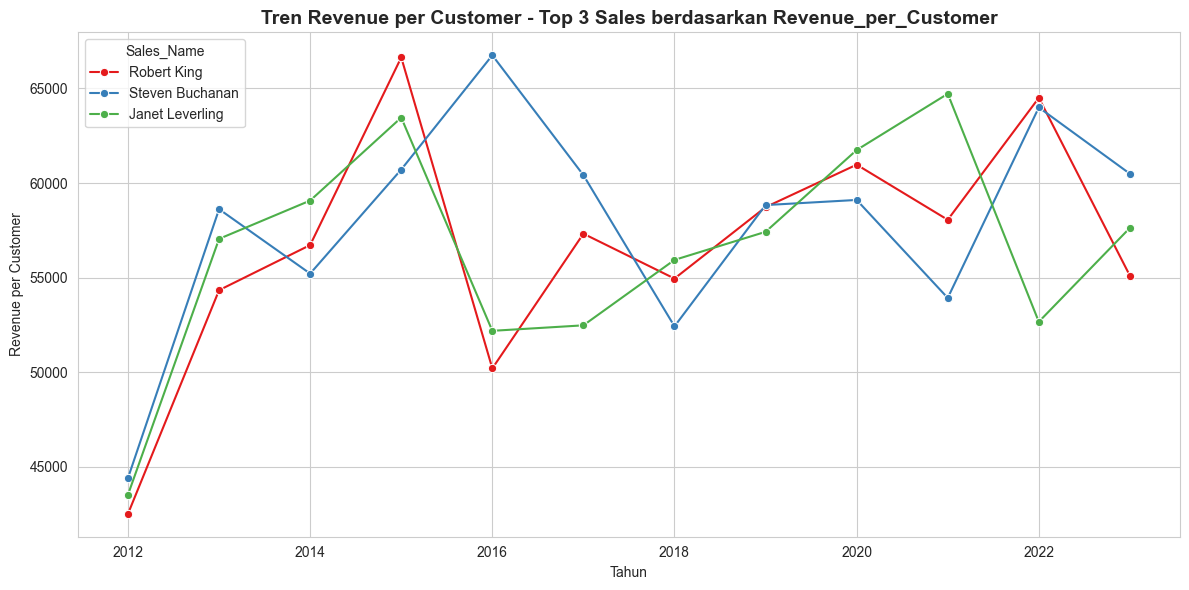

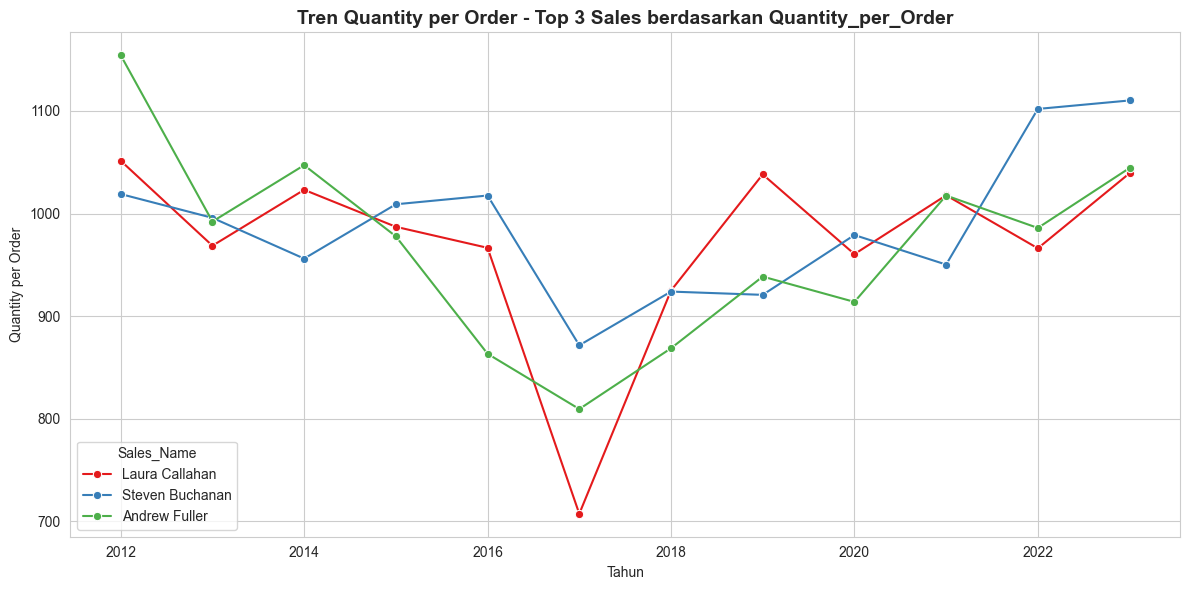

In [69]:
# Daftar metrik performa yang ingin dianalisis
metrics = [
    'Orders_Handled', 
    'Total_Customer', 
    'Total_Product_Sold',  
    'Total_Quantity_Sold', 
    'Total_Sales',
    'Average_Sales',
    'Revenue_per_Order',
    'Revenue_per_Customer',
    'Quantity_per_Order'
]

# Loop untuk setiap metrik
for metric in metrics:
    # Ambil total per Sales_Name untuk metrik ini
    total_per_sales = yearly_sales_report.groupby('Sales_Name')[metric].sum().reset_index()

    # Ambil top 3 sales berdasarkan metrik ini
    top_3_name = total_per_sales.sort_values(by=metric, ascending=False).head(3)['Sales_Name'].tolist()

    # Filter data hanya untuk top 3 sales pada metrik ini
    top_3_employee = yearly_sales_report[yearly_sales_report['Sales_Name'].isin(top_3_name)]

    # Plot line chart-nya
    plt.figure(figsize=(12,6))
    sns.lineplot(
        data=top_3_employee,
        x='Order_Year',
        y=metric,
        hue='Sales_Name',
        palette= 'Set1',
        marker='o',
        estimator='sum',
        errorbar=None
    )

    # Format chart
    plt.title(f'Tren {metric.replace("_", " ")} - Top 3 Sales berdasarkan {metric}', fontsize=14, fontweight='bold')
    plt.xlabel('Tahun')
    plt.ylabel(metric.replace("_", " "))
    plt.tight_layout()
    plt.show()

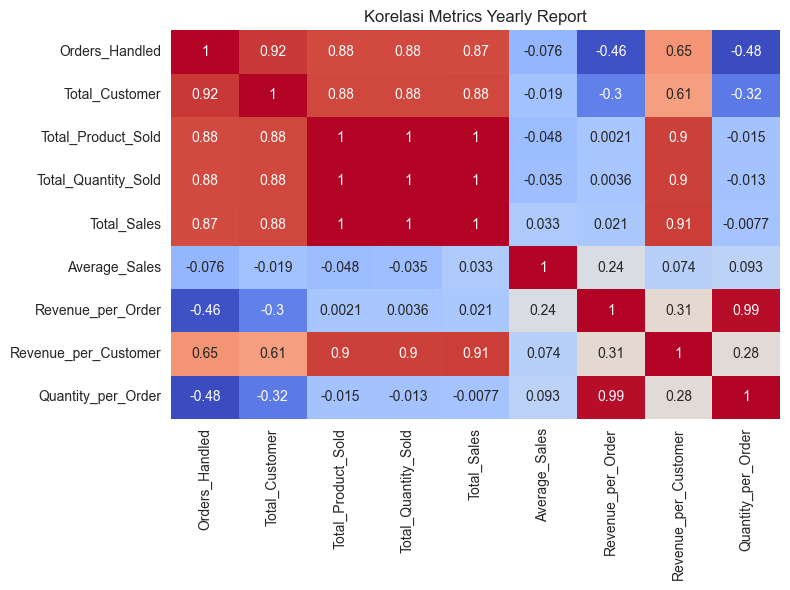

In [70]:
yearly_corr = yearly_sales_report[metrics].corr()

plt.figure(figsize=(8,6))
sns.heatmap(data = yearly_corr,
            annot= True,
            cbar= False,
            cmap= 'coolwarm')

plt.title('Korelasi Metrics Yearly Report')

plt.tight_layout()
plt.show()

In [71]:
yearly_scale = yearly_sales_report[metrics]

yearly_scale[yearly_scale.columns] = scaler.fit_transform(yearly_sales_report[metrics])

yearly_scale

C:\Users\rafli\AppData\Local\Temp\ipykernel_19924\1181881468.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Orders_Handled  Total_Customer  Total_Product_Sold  Total_Quantity_Sold  \
0          0.816439        0.889921            1.759712             1.758256   
1          0.848537        1.124626            1.616270             1.620144   
2          1.265822        0.889921            1.608620             1.650101   
3          1.297921        0.889921            1.577063             1.539414   
4          0.752241        0.303160            1.339906             1.312111   
..              ...             ...                 ...                  ...   
103       -2.361342       -2.161238           -2.840944            -2.836926   
104       -2.618132       -2.982704           -2.888758            -2.874363   
105       -2.457638       -3.452113           -3.025506            -3.014818   
106       -2.874922       -3.804170           -3.106790            -3.142693   
107       -3.003317       -3.569465           -3.149822            -3.170647   

     Total_Sales  Average_Sales  Revenue_per_Order  Revenue_per_Customer  \
0       1.845560       0.761274           1.607676              2.013432   
1       1.718136       0.926787           1.302000              1.562550   
2       1.602614      -0.075366           0.224007              1.646951   
3       1.481127      -0.915601          -0.042045              1.463691   
4       1.187184      -1.495086           0.545132              1.673817   
..           ...            ...                ...                   ...   
103    -2.857479      -0.379099          -1.012013             -3.269346   
104    -2.899440      -0.233136           0.020556             -2.553065   
105    -3.029810      -0.068031          -1.330125             -2.336884   
106    -3.131303      -0.643904           0.324821             -2.158142   
107    -3.151181       0.016707           1.049819             -2.528825   

     Quantity_per_Order  
0              1.457574  
1              1.127888  
2              0.289873  
3              0.037187  
4              0.774670  
..                  ...  
103           -0.868095  
104            0.230736  
105           -1.206036  
106            0.383260  
107            1.083166  

[108 rows x 9 columns]

In [72]:
pca = PCA(n_components=2)  # atau bisa 3 kalau ingin eksplorasi 3D
yearly_pca = pca.fit_transform(yearly_scale)

df_pca = pd.DataFrame(yearly_pca, columns= ['PC1', 'PC2'])

# Opsional: melihat proporsi variansi yang dijelaskan
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.60235437 0.26636008]


In [73]:
inertia_year, sil_score_year = find_inertia_silhoutte_score(data= yearly_pca, num_clusters= num_clusters)

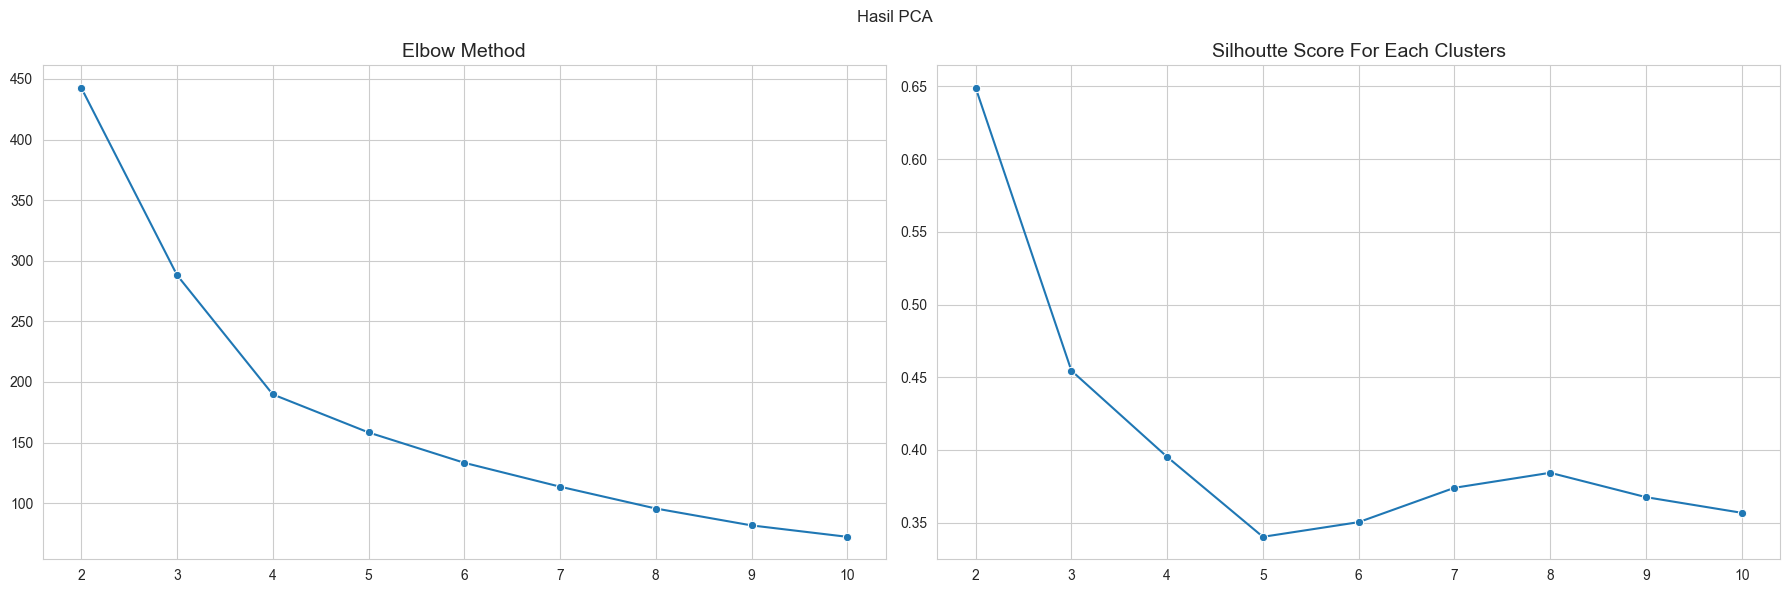

In [74]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.lineplot(x = num_clusters,
             y = inertia_year,
             marker = 'o')
plt.title('Elbow Method', fontsize = 14)

plt.subplot(1,2,2)
sns.lineplot(x = num_clusters,
             y = sil_score_year,
             marker = 'o')
plt.title('Silhoutte Score For Each Clusters', fontsize = 14)

plt.suptitle('Hasil PCA')
plt.tight_layout()
plt.show()

In [75]:
kmeans_year = KMeans(n_clusters= 4, random_state= 42, n_init= 100, init= 'k-means++').fit(yearly_pca)

labels = kmeans_year.labels_

df_pca['Cluster'] = labels
yearly_sales_report['Cluster'] = labels

In [76]:
df_pca

PC1       PC2  Cluster
0    3.502057  2.828892        1
1    3.305768  2.253250        1
2    3.496727  0.819781        1
3    3.371438  0.259269        1
4    2.601317  1.181398        1
..        ...       ...      ...
103 -6.507036 -2.148509        3
104 -6.857638 -0.417612        3
105 -6.907943 -2.091871        3
106 -7.468832  0.014570        3
107 -7.694249  0.912798        3

[108 rows x 3 columns]

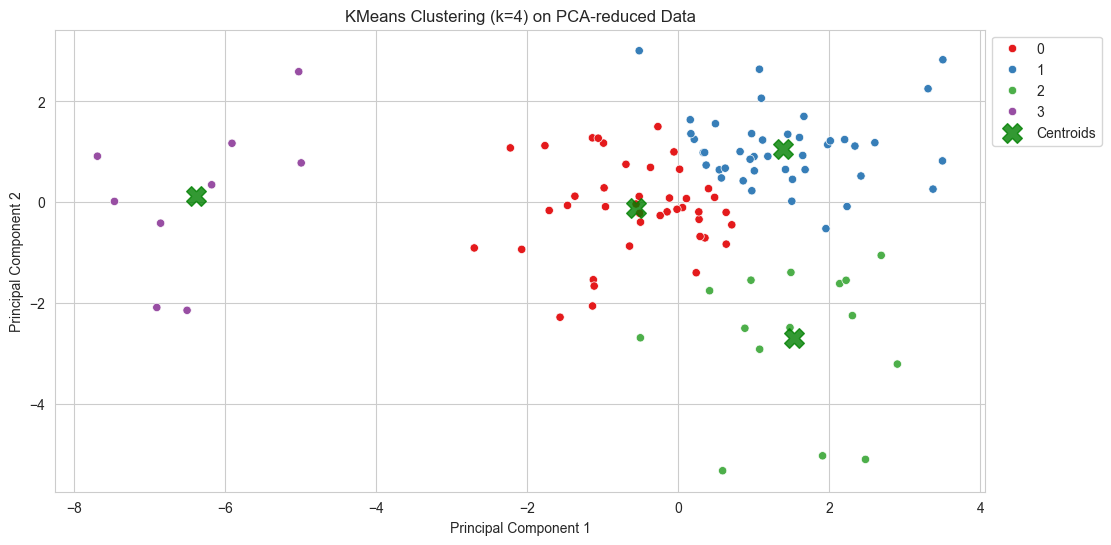

In [77]:
plt.figure(figsize=(12,6))

sns.scatterplot(data = df_pca,
                x = 'PC1',
                y = 'PC2',
                hue = 'Cluster',
                palette= 'Set1')
plt.title('KMeans Clustering (k=4) on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Tambahkan centroids
centroids = kmeans_year.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=200, alpha=0.8, marker='X', label='Centroids')

plt.legend(bbox_to_anchor = [1,1])
plt.show()


In [78]:
summary = yearly_sales_report.copy()
summary.drop(columns= ['EmployeeID', 'Order_Year', 'Total_Category_Sold'], inplace= True)

summary.groupby('Cluster').mean(numeric_only= True)

Orders_Handled  Total_Customer  Total_Product_Sold  \
Cluster                                                       
0            142.547619       72.833333         5375.142857   
1            160.761905       76.428571         6360.142857   
2            191.200000       80.866667         6053.800000   
3             72.666667       49.666667         2835.666667   

         Total_Quantity_Sold   Total_Sales  Average_Sales  Revenue_per_Order  \
Cluster                                                                        
0              137038.976190  3.949528e+06     734.965094       27748.359762   
1              162108.190476  4.688924e+06     737.466247       29218.386905   
2              154525.266667  4.448167e+06     734.630347       23395.506000   
3               72816.000000  2.091467e+06     737.119715       28764.265556   

         Revenue_per_Customer  Quantity_per_Order  
Cluster                                            
0                54267.523095          962.782143  
1                61331.187143         1009.984524  
2                55044.011333          812.763333  
3                42035.855556         1001.768889

In [79]:
yearly_sales_report['Performance_Type'] = yearly_sales_report['Cluster'].map({
    0 : 'Consistent Performance',
    1 : 'Top Performers',
    2 : 'Quantity-Focused Sellers',
    3 : 'Value-Focused Sellers'
})

yearly_sales_report.drop(columns= 'Cluster', inplace= True)

yearly_sales_report

EmployeeID        Sales_Name                     Title  Order_Year  \
0             4  Margaret Peacock      Sales Representative        2021   
1             1     Nancy Davolio      Sales Representative        2013   
2             8    Laura Callahan  Inside Sales Coordinator        2015   
3             8    Laura Callahan  Inside Sales Coordinator        2016   
4             7       Robert King      Sales Representative        2015   
..          ...               ...                       ...         ...   
103           6    Michael Suyama      Sales Representative        2012   
104           4  Margaret Peacock      Sales Representative        2012   
105           1     Nancy Davolio      Sales Representative        2012   
106           7       Robert King      Sales Representative        2012   
107           8    Laura Callahan  Inside Sales Coordinator        2012   

     Orders_Handled  Total_Customer  Total_Product_Sold  Total_Category_Sold  \
0               176              81                7481                    8   
1               177              83                7331                    8   
2               190              81                7323                    8   
3               191              81                7290                    8   
4               174              76                7042                    8   
..              ...             ...                 ...                  ...   
103              77              55                2670                    8   
104              69              48                2620                    8   
105              74              44                2477                    8   
106              61              41                2392                    8   
107              57              43                2347                    8   

     Total_Quantity_Sold  Total_Sales  Average_Sales  Revenue_per_Order  \
0                 190408   5570857.60     744.667504           31652.60   
1                 186752   5472859.56     746.536565           30920.11   
2                 187545   5384014.22     735.219749           28336.92   
3                 184615   5290581.92     725.731402           27699.38   
4                 178598   5064518.90     719.187575           29106.43   
..                   ...          ...            ...                ...   
103                68768   1953878.90     731.789850           25375.05   
104                67777   1921607.91     733.438134           27849.39   
105                64059   1821344.51     735.302588           24612.76   
106                60674   1743288.51     728.799544           28578.50   
107                59934   1728001.01     736.259484           30315.81   

     Revenue_per_Customer  Quantity_per_Order       Performance_Type  
0                68776.02             1081.86         Top Performers  
1                65938.07             1055.10         Top Performers  
2                66469.31              987.08         Top Performers  
3                65315.83              966.57         Top Performers  
4                66638.41             1026.43         Top Performers  
..                    ...                 ...                    ...  
103              35525.07              893.09  Value-Focused Sellers  
104              40033.50              982.28  Value-Focused Sellers  
105              41394.19              865.66  Value-Focused Sellers  
106              42519.23              994.66  Value-Focused Sellers  
107              40186.07             1051.47  Value-Focused Sellers  

[108 rows x 15 columns]

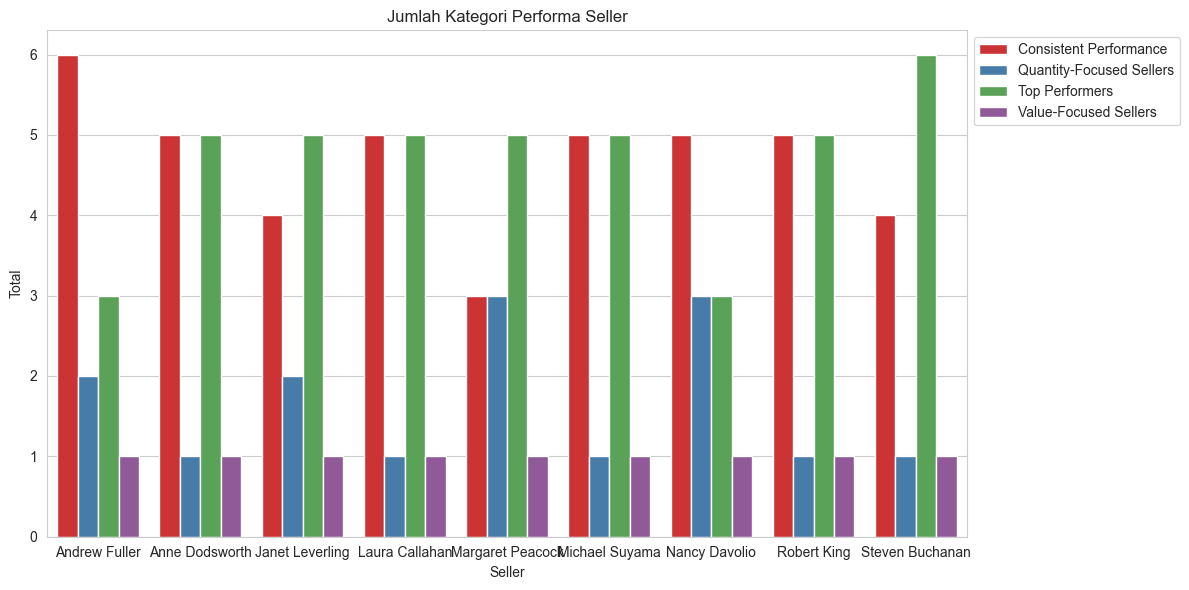

In [80]:
performance_type = yearly_sales_report.groupby(['Sales_Name', 'Performance_Type']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))

sns.barplot(data = performance_type,
            x = 'Sales_Name',
            y = 'Count',
            hue = 'Performance_Type',
            palette= 'Set1',
            )

plt.title('Jumlah Kategori Performa Seller')
plt.xlabel('Seller')
plt.ylabel('Total')
plt.legend(bbox_to_anchor = [1,1])

plt.tight_layout()
plt.show()

In [81]:
performance_type.head()

Sales_Name          Performance_Type  Count
0   Andrew Fuller    Consistent Performance      6
1   Andrew Fuller  Quantity-Focused Sellers      2
2   Andrew Fuller            Top Performers      3
3   Andrew Fuller     Value-Focused Sellers      1
4  Anne Dodsworth    Consistent Performance      5

In [82]:
yearly_sales_report.to_csv('Yearly_Sales_Report.csv')

In [83]:
top_employee = df_employee.groupby(['EmployeeID', 'Sales_Name', 'Title']).agg({
    'OrderID' : 'nunique',
    'Customer_Name' : 'nunique',
    'Product' : 'count',
    'Category' : 'nunique',
    'Quantity' : 'sum',
    'Total_Sales' : ['sum', 'mean']
}).reset_index()

top_employee.columns = ['EmployeeID', 'Sales_Name', 'Title', 'Orders_Handled', 'Total_Customer', 'Total_Product_Sold', 'Total_Category_Sold', 'Total_Quantity_Sold', 'Total_Sales', 'Average_Sales']

top_employee.sort_values('Total_Sales', ascending= False, inplace= True)

top_employee.reset_index(inplace= True, drop= True)

top_employee

EmployeeID        Sales_Name                     Title  Orders_Handled  \
0           4  Margaret Peacock      Sales Representative            1903   
1           5   Steven Buchanan             Sales Manager            1804   
2           3   Janet Leverling      Sales Representative            1846   
3           1     Nancy Davolio      Sales Representative            1843   
4           7       Robert King      Sales Representative            1786   
5           8    Laura Callahan  Inside Sales Coordinator            1794   
6           6    Michael Suyama      Sales Representative            1752   
7           9    Anne Dodsworth      Sales Representative            1765   
8           2     Andrew Fuller     Vice President, Sales            1768   

   Total_Customer  Total_Product_Sold  Total_Category_Sold  \
0              92               69860                    8   
1              92               69868                    8   
2              92               68246                    8   
3              92               67588                    8   
4              92               67356                    8   
5              92               67391                    8   
6              92               66186                    8   
7              92               66359                    8   
8              92               66356                    8   

   Total_Quantity_Sold   Total_Sales  Average_Sales  
0              1783175  5.148127e+07     736.920527  
1              1774436  5.138646e+07     735.479176  
2              1737784  5.044557e+07     739.172607  
3              1727957  4.965459e+07     734.665814  
4              1719273  4.964695e+07     737.082818  
5              1718406  4.927812e+07     731.226977  
6              1694439  4.913858e+07     742.431648  
7              1694044  4.901882e+07     738.691367  
8              1687890  4.831033e+07     728.047694

In [84]:
time_performance = df_employee.groupby(['OrderID', 'Sales_Name', 'OrderDate', 'ShippedDate'])['Total_Sales'].sum().reset_index()

time_performance['Processing_Days'] = time_performance['ShippedDate'] - time_performance['OrderDate']

work_efficiency = time_performance.groupby('Sales_Name')['Processing_Days'].mean().reset_index().sort_values('Processing_Days', ascending= True)

top_employee = pd.merge(top_employee, work_efficiency, on = 'Sales_Name')

top_employee


EmployeeID        Sales_Name                     Title  Orders_Handled  \
0           4  Margaret Peacock      Sales Representative            1903   
1           5   Steven Buchanan             Sales Manager            1804   
2           3   Janet Leverling      Sales Representative            1846   
3           1     Nancy Davolio      Sales Representative            1843   
4           7       Robert King      Sales Representative            1786   
5           8    Laura Callahan  Inside Sales Coordinator            1794   
6           6    Michael Suyama      Sales Representative            1752   
7           9    Anne Dodsworth      Sales Representative            1765   
8           2     Andrew Fuller     Vice President, Sales            1768   

   Total_Customer  Total_Product_Sold  Total_Category_Sold  \
0              92               69860                    8   
1              92               69868                    8   
2              92               68246                    8   
3              92               67588                    8   
4              92               67356                    8   
5              92               67391                    8   
6              92               66186                    8   
7              92               66359                    8   
8              92               66356                    8   

   Total_Quantity_Sold   Total_Sales  Average_Sales           Processing_Days  
0              1783175  5.148127e+07     736.920527 8 days 00:41:37.109826589  
1              1774436  5.138646e+07     735.479176 7 days 14:54:48.691796008  
2              1737784  5.044557e+07     739.172607 7 days 20:35:37.378114842  
3              1727957  4.965459e+07     734.665814 7 days 13:44:18.491589799  
4              1719273  4.964695e+07     737.082818 8 days 01:01:16.595744680  
5              1718406  4.927812e+07     731.226977 7 days 21:01:48.361204013  
6              1694439  4.913858e+07     742.431648 8 days 00:20:32.876712328  
7              1694044  4.901882e+07     738.691367 7 days 22:03:19.886685552  
8              1687890  4.831033e+07     728.047694 7 days 16:24:42.352941176

In [85]:
top_employee.to_csv('Summary_Employee.csv')

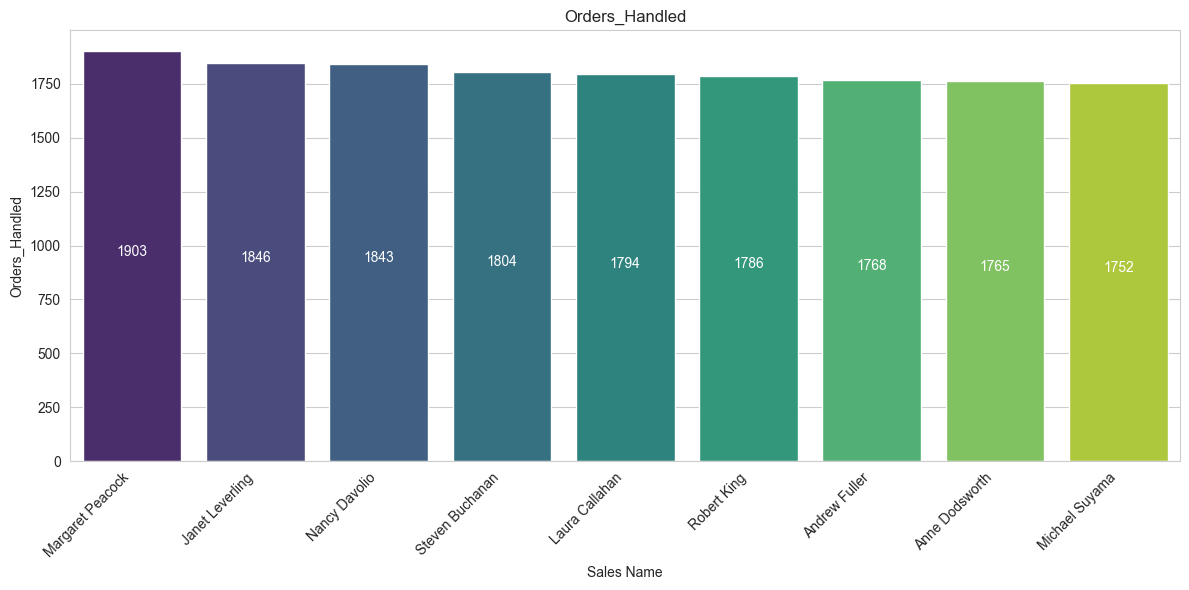

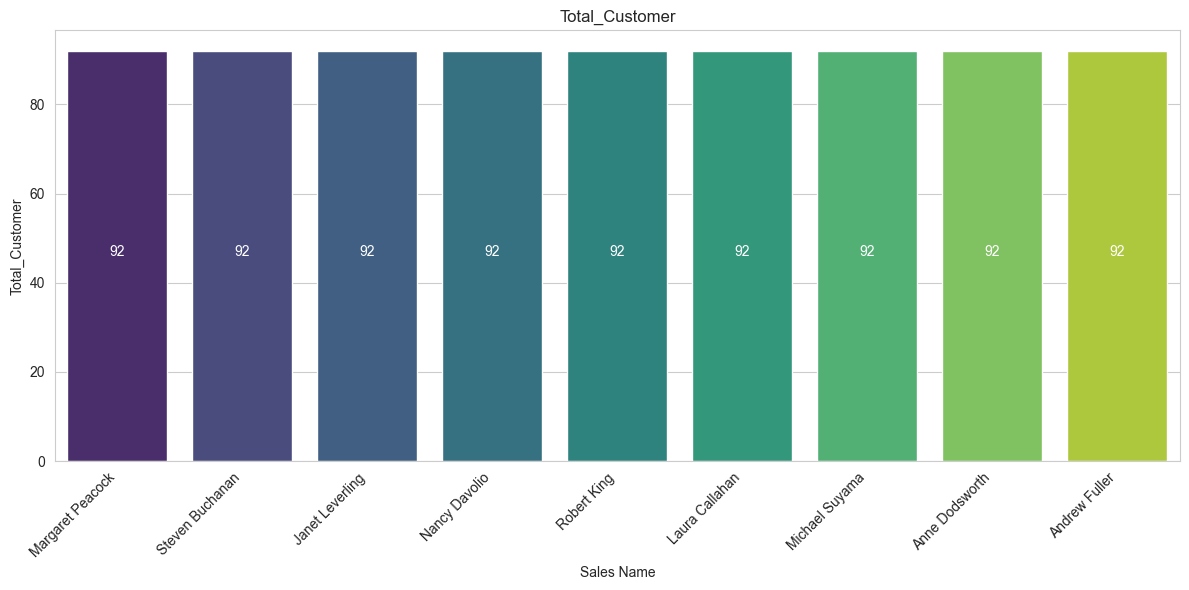

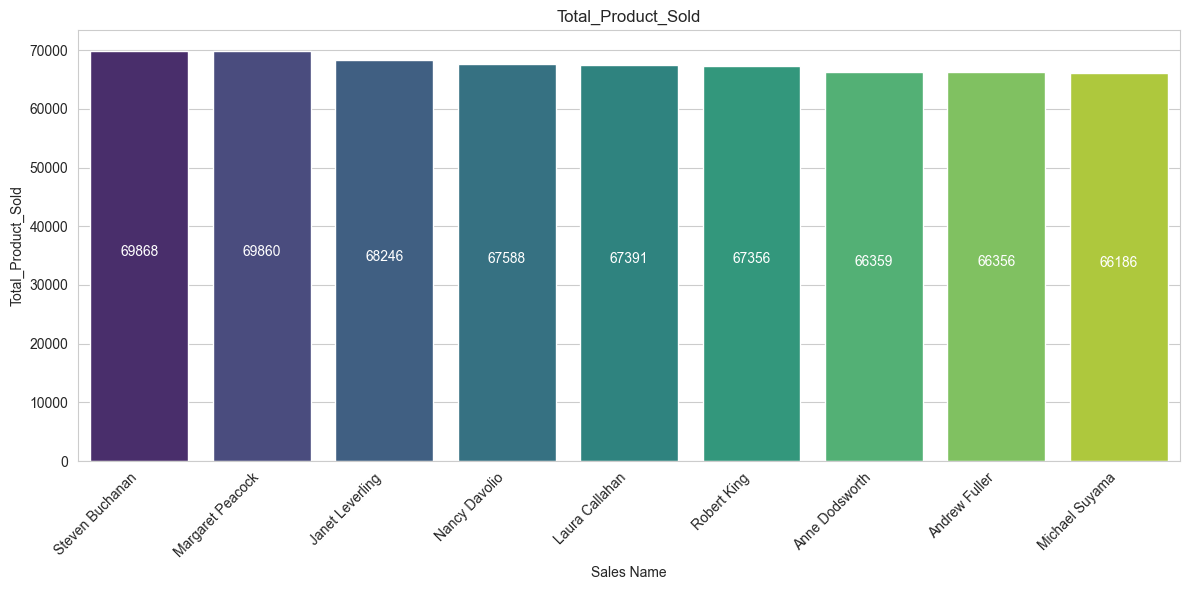

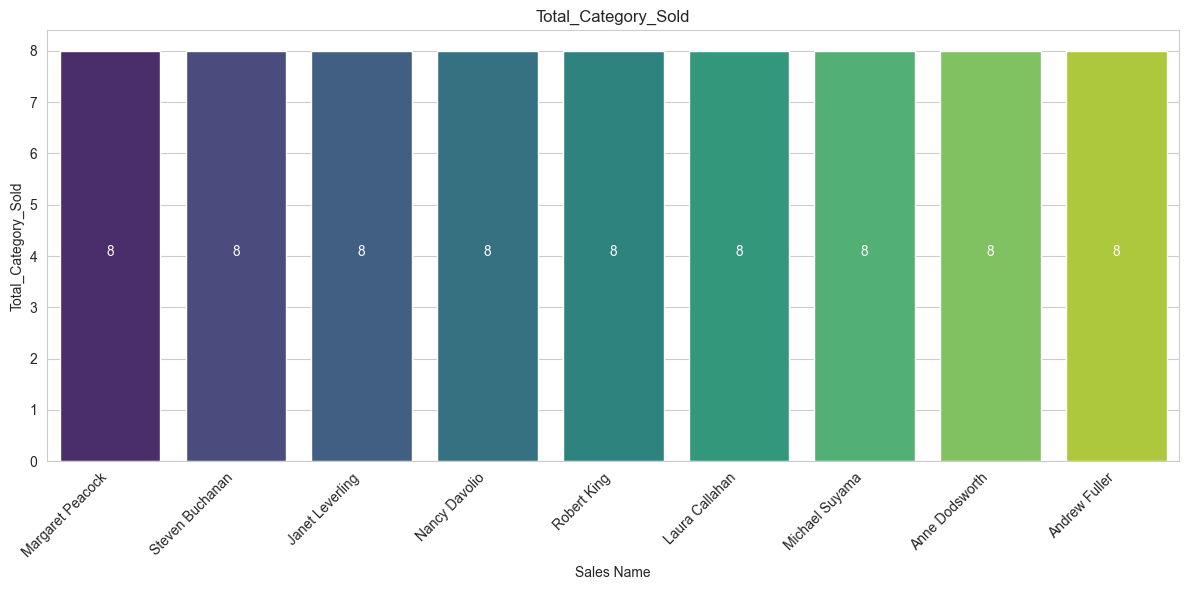

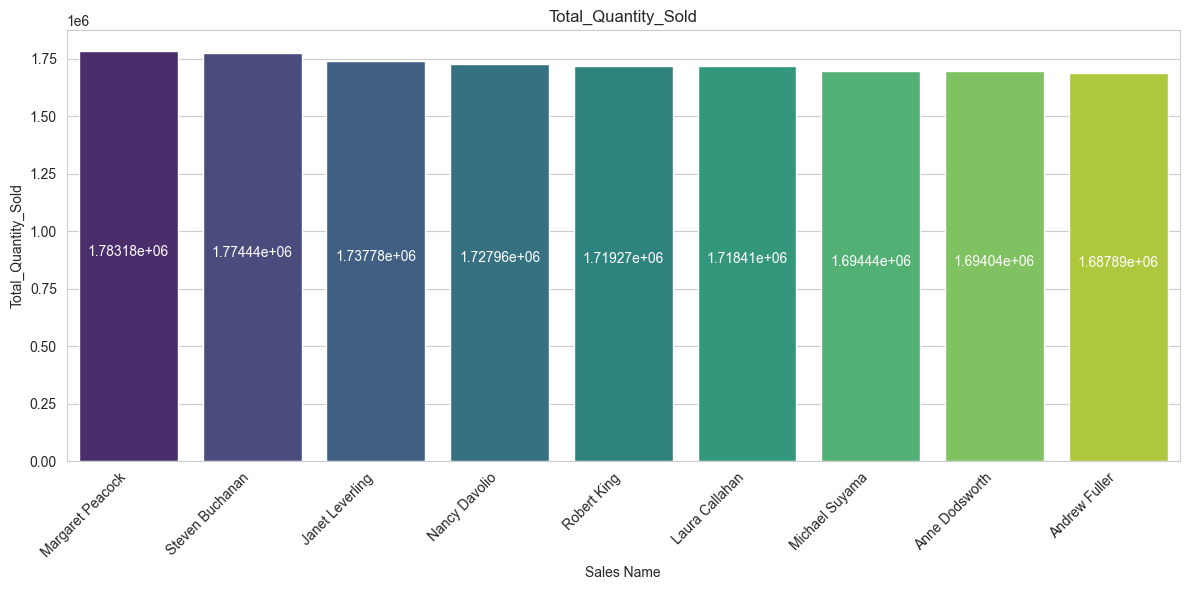

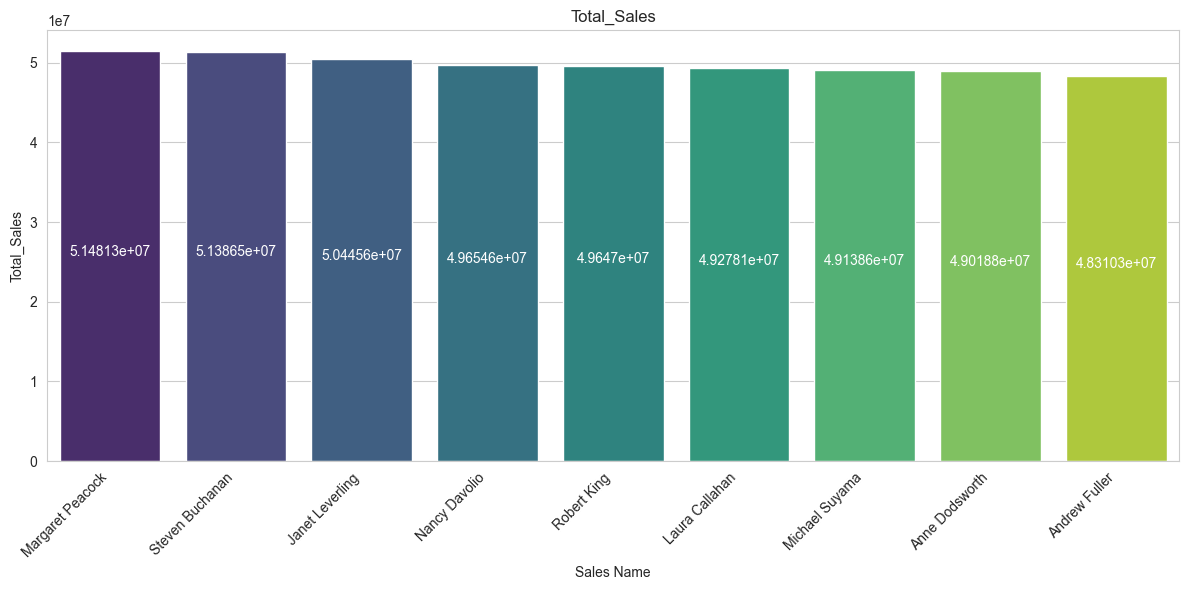

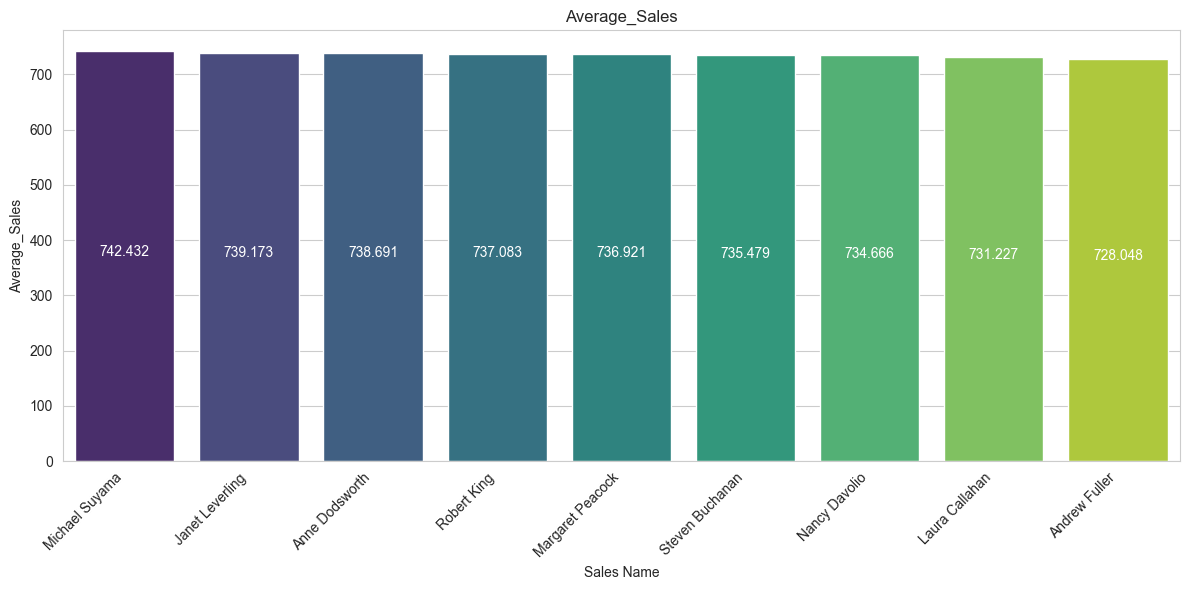

In [86]:
employee_columns = ['Orders_Handled', 'Total_Customer', 'Total_Product_Sold', 'Total_Category_Sold', 'Total_Quantity_Sold', 'Total_Sales', 'Average_Sales']


for col in employee_columns:

    sorted_data = top_employee.sort_values(by=col, ascending=False)

    plt.figure(figsize=(12,6))

    ax = sns.barplot(data = sorted_data,
                x = 'Sales_Name',
                y = col,
                hue = 'Sales_Name',
                palette= 'viridis')
    plt.title(col)
    plt.xlabel('Sales Name')
    plt.ylabel(col)
    plt.xticks(rotation = 45, ha = 'right')

    for container in ax.containers:
        ax.bar_label(container, label_type= 'center', padding= 3, fontsize = 10, color = 'white')

    plt.tight_layout()
    plt.show()